In [391]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [392]:
import numpy as np
import pandas as pd

In [393]:
df = pd.read_csv('C://Users//acer//Dropbox//PC//Desktop//learn//Sem5//ML inPython//LinearRegretionAssignment//CarPrice_Assignment.csv')

In [394]:
# Checking the head of our dataset
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [395]:
# Checking the shape of our dataset
df.shape

(205, 26)

In [396]:
# Checking for not-null values and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [397]:
# Checking the statistical data
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

# Data Preparation

In [398]:
# Converting the object Dtype into binary...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [399]:
# for maximum columns to display..
pd.set_option('display.max_columns', None)


In [400]:
# Firstly checking for CarName as it is an object
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [401]:
# Since we have CarName as combined with company and model... So firstly we will separate the company name and model from CarName and 
# store them into two new columns as 'company' and 'model' respectively.
df[['company','model']] = df['CarName'].str.split(' ',n=1,expand=True)
df

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  carlength  \
0          two  convertible        rwd          front       88.6      168.8   
1          two  convertible        rwd          front       88.6      168.8   
2          two    hatchback        rwd          front       94.5      171.2   
3         four        sedan        fwd          front       99.8      176.6   
4         four        sedan        4wd          front       99.4      176.6   
..         ...          ...        ...            ...        ...        ...   
200       four        sedan        rwd          front      109.1      188.8   
201       four        sedan        rwd          front      109.1      188.8   
202       four        sedan        rwd          front      109.1      188.8   
203       four        sedan        rwd          front      109.1      188.8   
204       four        sedan        rwd          front      109.1      188.8   

     carwidth  carheight  curbweight enginetype cylindernumber  enginesize  \
0        64.1       48.8        2548       dohc           four         130   
1        64.1       48.8        2548       dohc           four         130   
2        65.5       52.4        2823       ohcv            six         152   
3        66.2       54.3        2337        ohc           four         109   
4        66.4       54.3        2824        ohc           five         136   
..        ...        ...         ...        ...            ...         ...   
200      68.9       55.5        2952        ohc           four         141   
201      68.8       55.5        3049        ohc           four         141   
202      68.9       55.5        3012       ohcv            six         173   
203      68.9       55.5        3217        ohc            six         145   
204      68.9       55.5        3062        ohc           four         141   

    fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         mpfi       3.47    2.68               9.0         111     5000   
1         mpfi       3.47    2.68               9.0         111     5000   
2         mpfi       2.68    3.47               9.0         154     5000   
3         mpfi       3.19    3.40              10.0         102     5500   
4         mpfi       3.19    3.40               8.0         115     5500   
..         ...        ...     ...               ...         ...      ...   
200       mpfi       3.78    3.15               9.5         114     5400   
201       mpfi       3.78    3.15               8.7         160     5300   
202       mpfi       3.58    2.87               8.8         134     5500   
203        idi       3.01    3.40              23.0         106     4800   
204       mpfi       3.78    3.15               9.5         114     5400   

     citympg  highwaympg    price      company         model  
0         21          27  13495.0  alfa-romero        giulia  
1         21          27  16500.0  alfa-romero       stelvio  
2         19          26  16500.0  alfa-romero  Quadrifoglio  
3         24          30  13950.0         audi        100 ls  
4         18          22  

In [402]:
# Now as we got the comapany name so we will now drop the 'CarName' and 'model' as well...
df = df.drop(['CarName','model'],axis=1)
df

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0         1          3      gas        std        two  convertible        rwd   
1         2          3      gas        std        two  convertible        rwd   
2         3          1      gas        std        two    hatchback        rwd   
3         4          2      gas        std       four        sedan        fwd   
4         5          2      gas        std       four        sedan        4wd   
..      ...        ...      ...        ...        ...          ...        ...   
200     201         -1      gas        std       four        sedan        rwd   
201     202         -1      gas      turbo       four        sedan        rwd   
202     203         -1      gas        std       four        sedan        rwd   
203     204         -1   diesel      turbo       four        sedan        rwd   
204     205         -1      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0            front       88.6      168.8      64.1       48.8        2548   
1            front       88.6      168.8      64.1       48.8        2548   
2            front       94.5      171.2      65.5       52.4        2823   
3            front       99.8      176.6      66.2       54.3        2337   
4            front       99.4      176.6      66.4       54.3        2824   
..             ...        ...        ...       ...        ...         ...   
200          front      109.1      188.8      68.9       55.5        2952   
201          front      109.1      188.8      68.8       55.5        3049   
202          front      109.1      188.8      68.9       55.5        3012   
203          front      109.1      188.8      68.9       55.5        3217   
204          front      109.1      188.8      68.9       55.5        3062   

    enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0         dohc           four         130       mpfi       3.47    2.68   
1         dohc           four         130       mpfi       3.47    2.68   
2         ohcv            six         152       mpfi       2.68    3.47   
3          ohc           four         109       mpfi       3.19    3.40   
4          ohc           five         136       mpfi       3.19    3.40   
..         ...            ...         ...        ...        ...     ...   
200        ohc           four         141       mpfi       3.78    3.15   
201        ohc           four         141       mpfi       3.78    3.15   
202       ohcv            six         173       mpfi       3.58    2.87   
203        ohc            six         145        idi       3.01    3.40   
204        ohc           four         141       mpfi       3.78    3.15   

     compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0                 9.0         111     5000       21          27  13495.0   
1                 9.0         111     5000       21          27  16500.0   
2                 9.0         154     5000       19          26  16500.0   
3                10.0         102     5500       24          30  13950.0   
4                 8.0         115     5500       18          22  17450.0   
..                ...         ...      ...      ...         ...      ...   
200               9.5         114     5400       23          28  16845.0   
201               8.7         160     5300       19          25  19045.0   
202               8.8         134     5500       18          23  21485.0   
203              23.0         106     4800       26          27  22470.0   
204               9.5         114     5400       19          25  22625.0   

         company  
0    alfa-romero  
1    alfa-romero  
2    alfa-romero  
3           audi  
4           audi  
..           ...  
200        volvo  
201        volvo  
202        volvo  
203        volvo  
204        volvo  

[205 rows x 26 columns]

In [403]:
# Dropping duplicate values 
df=df.drop_duplicates()

In [404]:
# Dropping the car_ID variable which is not relevent for the price modeling
df = df.drop('car_ID',axis=1)

#  DATA VISUALIZATION


In [405]:
import matplotlib.pyplot as plt
import seaborn as sns

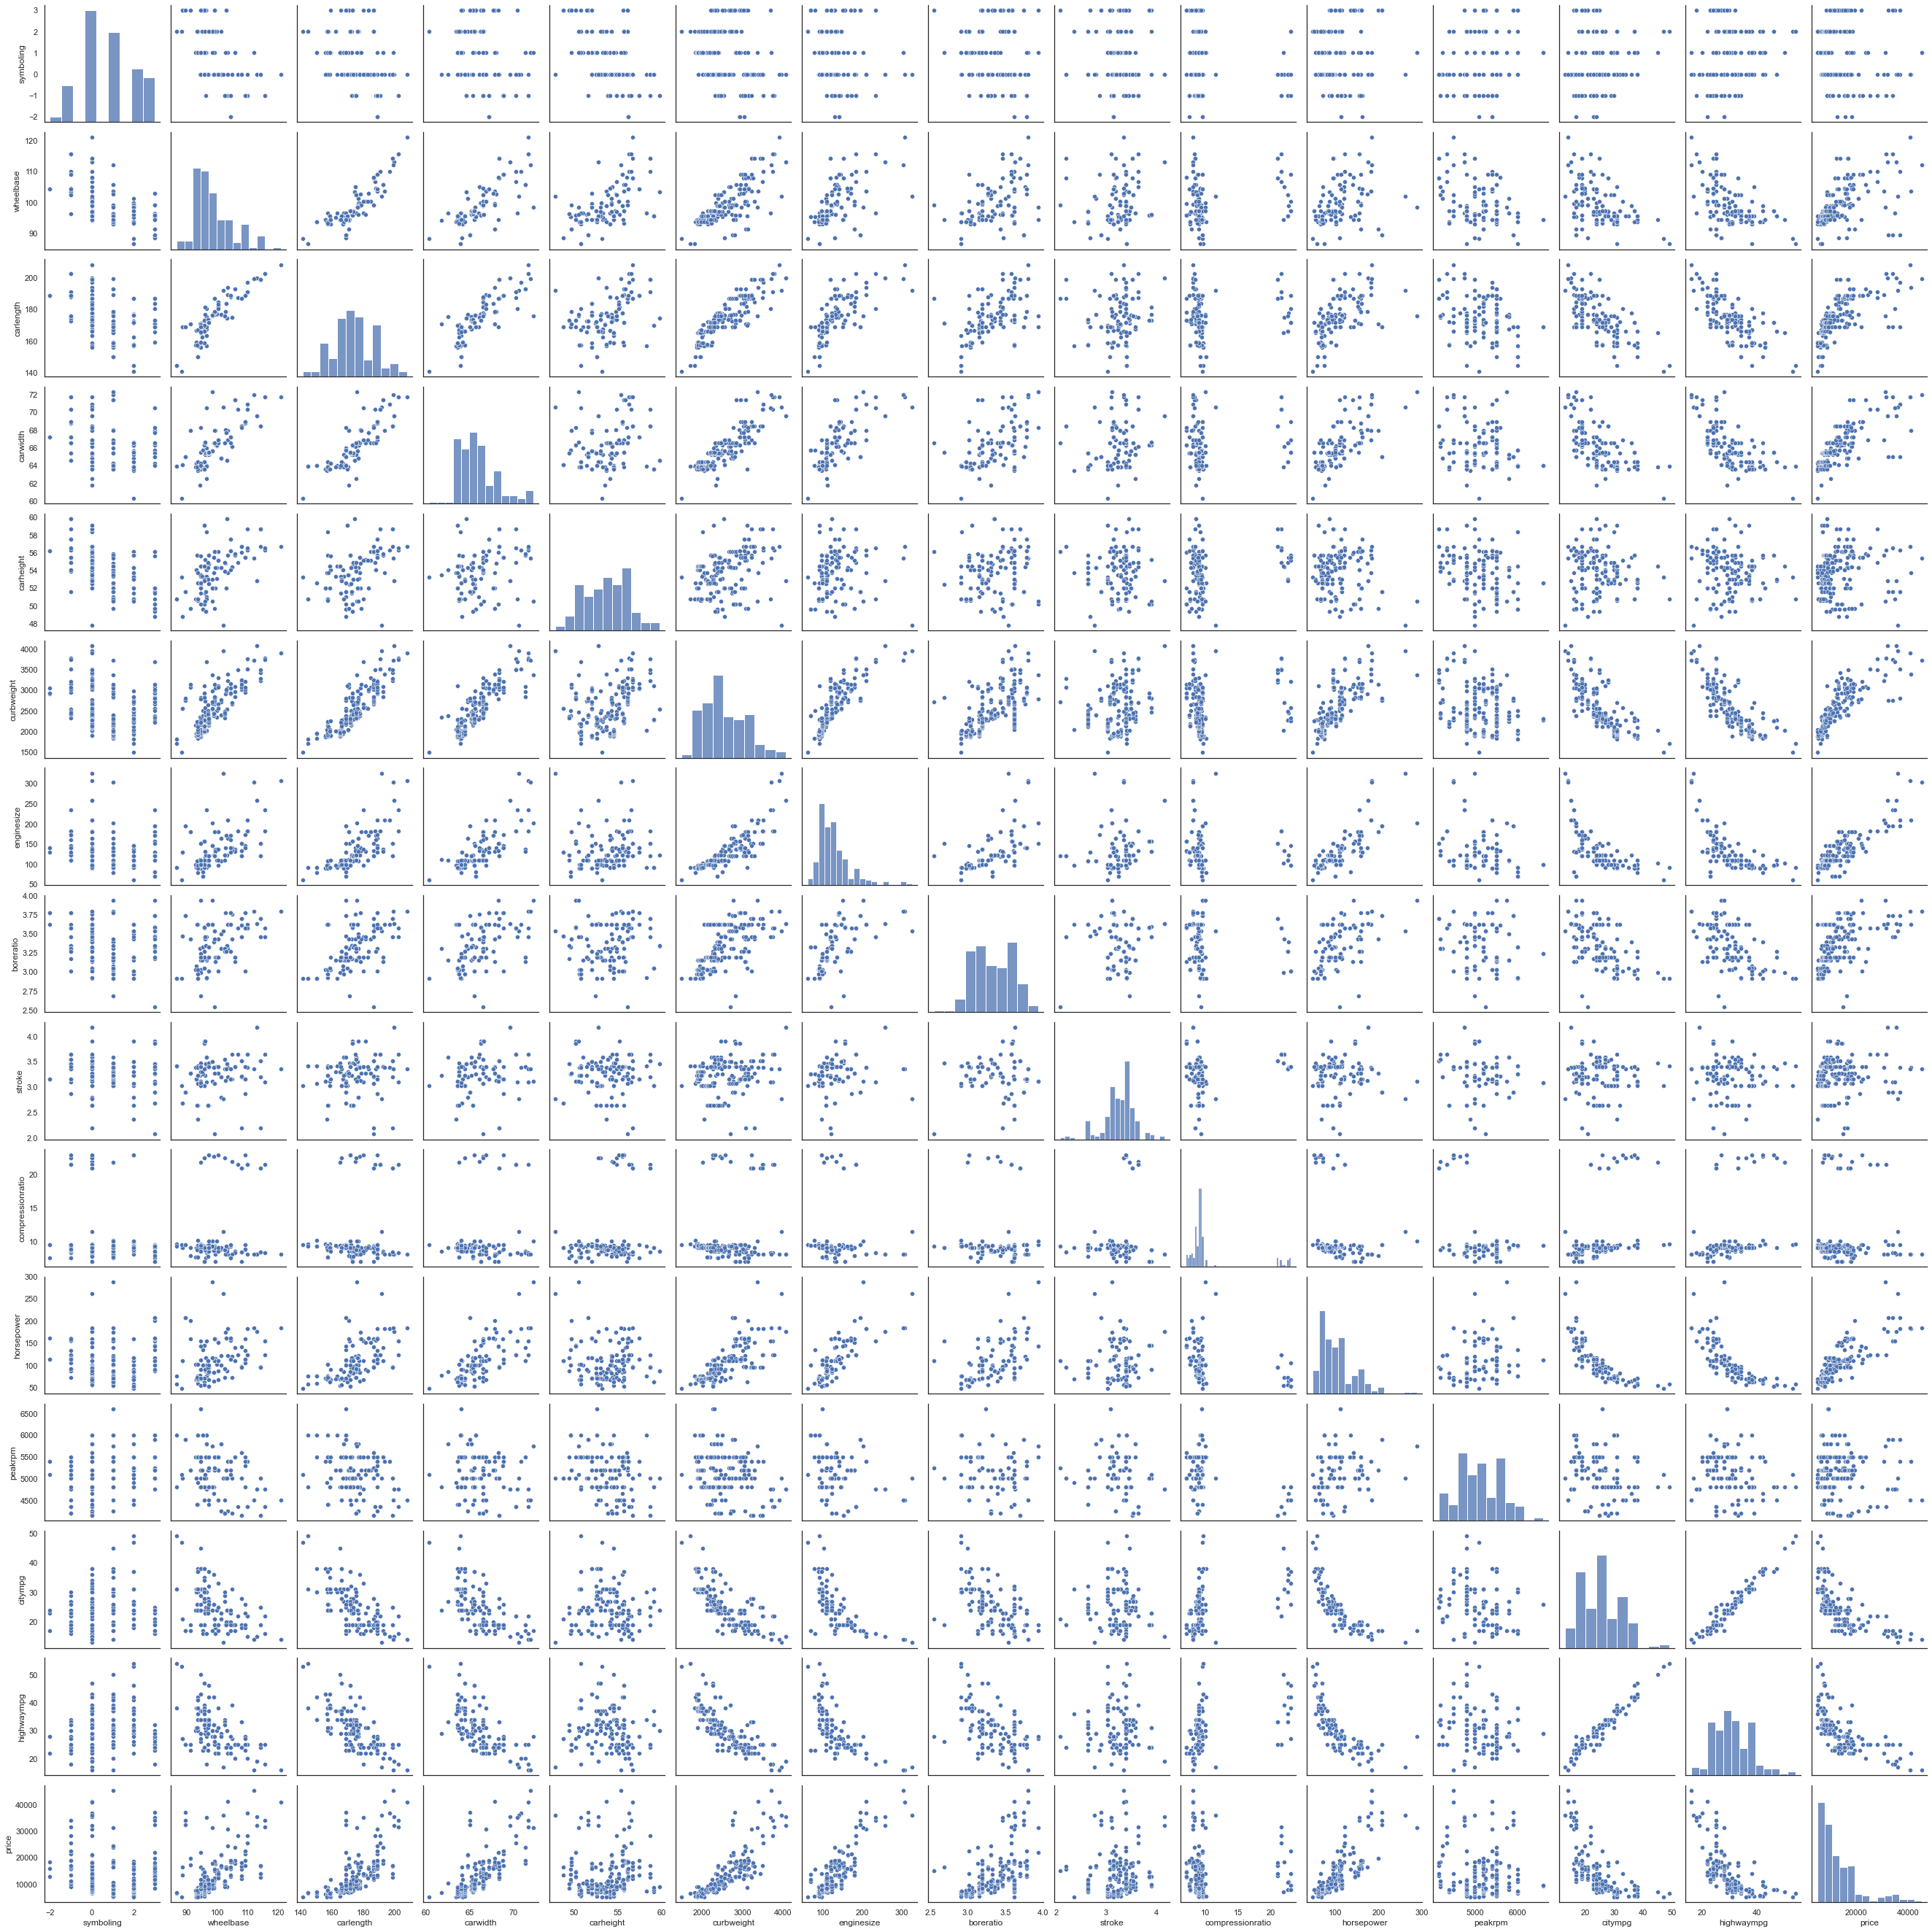

In [406]:
sns.pairplot(df)
plt.show()

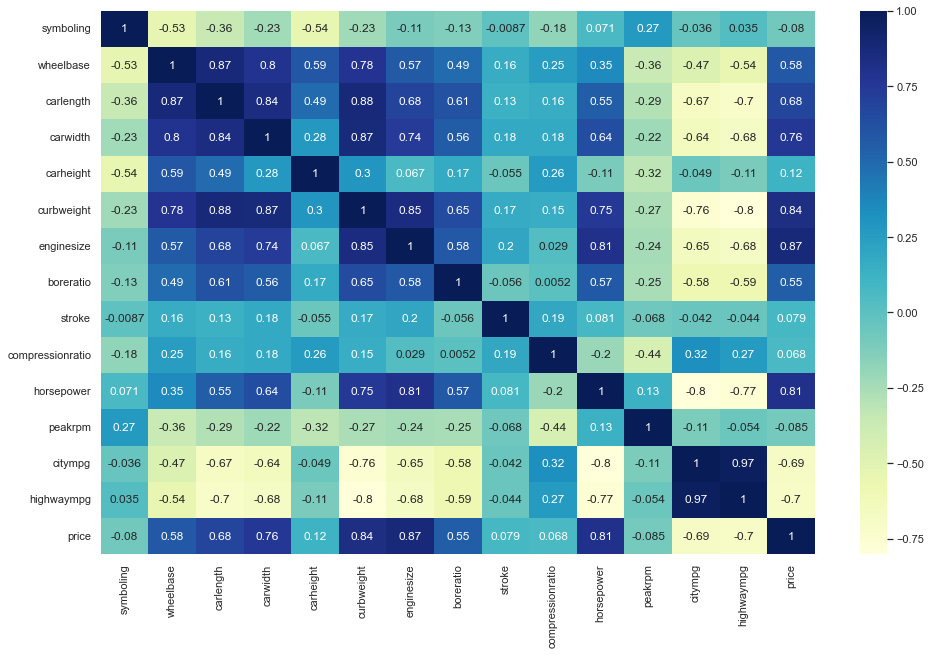

In [407]:
plt.figure(figsize = (16, 10))
df_corr = df.corr()
sns.heatmap(df_corr, annot = True, cmap="YlGnBu")
plt.show()

In [408]:
# Mapping 'symboling' as negative as safe, (0,1) as moderate and (2,3) as risky
df['symboling'] = df['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

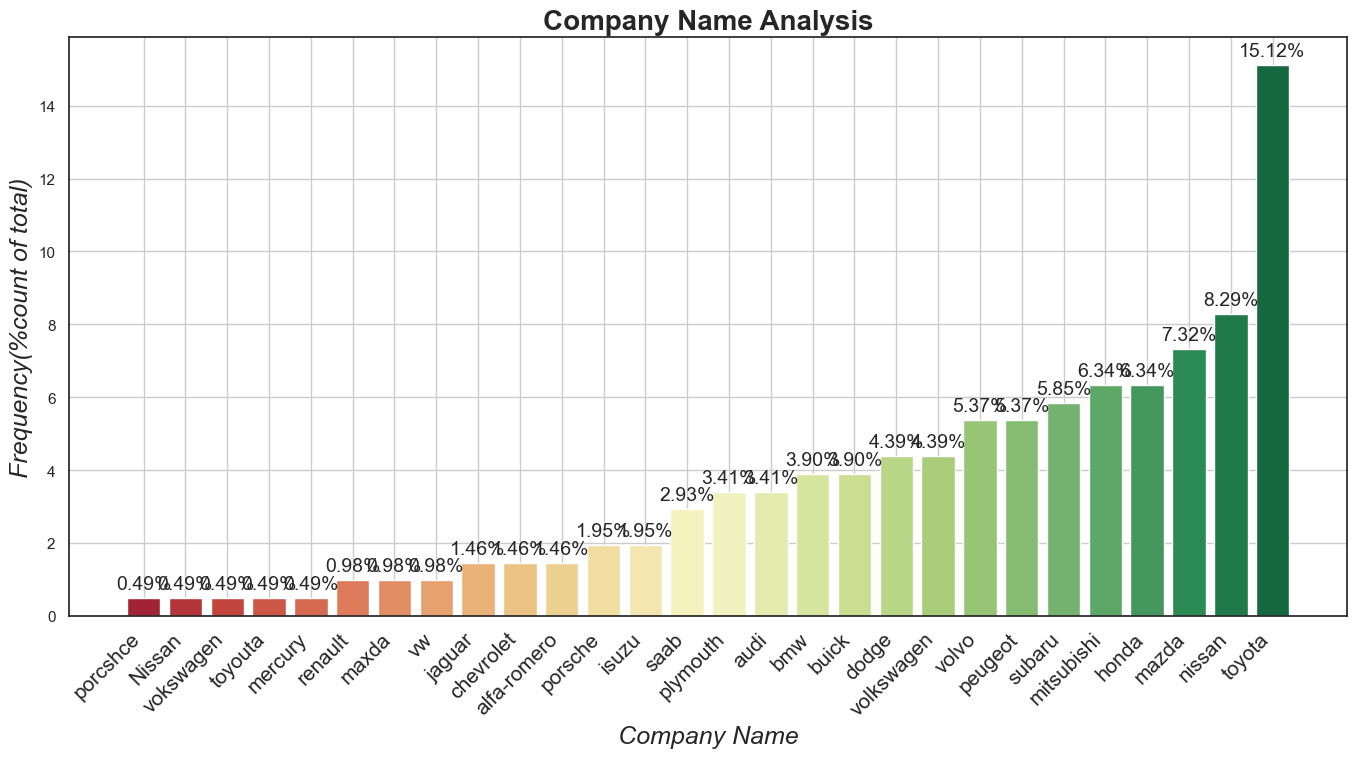

In [409]:
##Checking which car company is favored the most
sns.set(style='white')
plt.figure(figsize=(14, 21), dpi=100)

plt.subplot(311)
cn = pd.DataFrame((df.company.value_counts(normalize=True)*100).round(2).sort_values())
cn.reset_index(inplace=True)
ax_1 = sns.barplot(x='index',y='company', data=cn, palette='RdYlGn')

plt.setp(ax_1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Company Name', fontsize= 18, fontstyle='italic')
plt.ylabel('Frequency(%count of total)', fontsize= 18, fontstyle='italic')
plt.title('Company Name Analysis', fontsize=20, fontweight='bold')
plt.xticks(fontsize=15)
plt.ylim(0,20)
plt.grid(True)
for i in ax_1.patches:
    ax_1.annotate(format(i.get_height(), '.2f')+"%", (i.get_x() + i.get_width() / 2.\
                                                    , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=14)


plt.grid(True)
plt.tight_layout()
plt.autoscale()
plt.show()


Here Toyota is favoured the most

# Checking Outliers

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


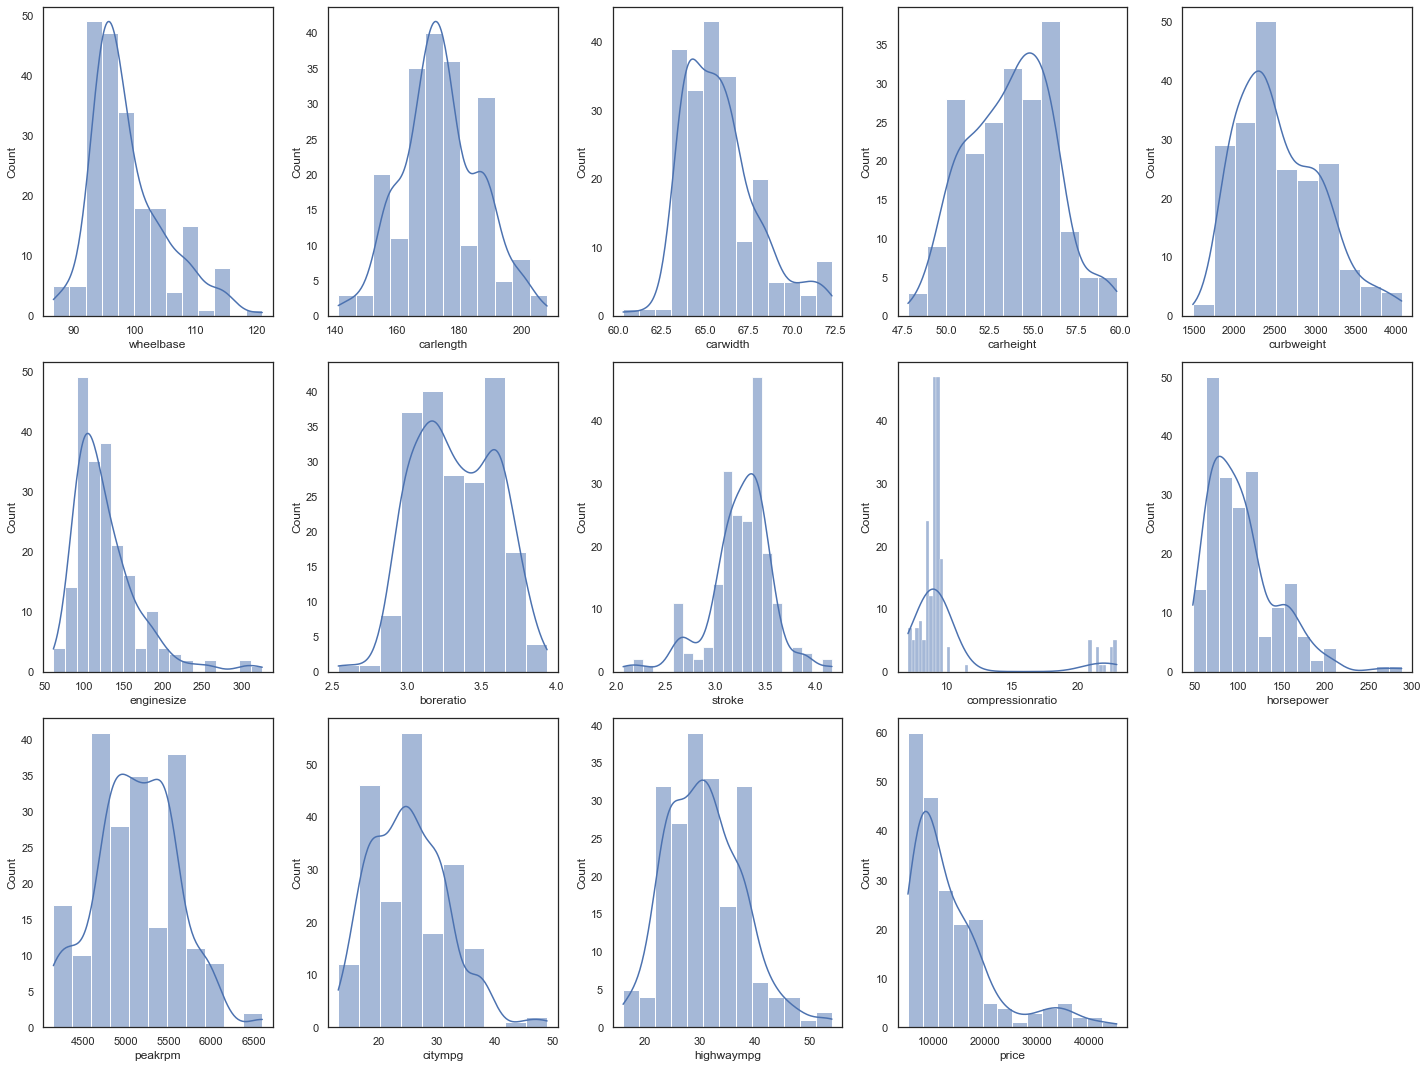

In [410]:
numeric_variables = list(df.columns[df.dtypes != 'object'])
print(numeric_variables)
plt.figure(figsize=(20, 15))

for i, var in enumerate(numeric_variables):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df[var], kde=True)
    
plt.tight_layout()
plt.show()



horsepower and compression ratio variables have a right skewed distribution  this is probably due to outliers in the variable.

In [411]:
print(df[['horsepower','curbweight','enginesize']].quantile([0.01, .96]))
print(df[['compressionratio']].quantile([0.01, .90]))

      horsepower  curbweight  enginesize
0.01       52.12     1819.72        70.0
0.96      182.00     3657.80       209.0
      compressionratio
0.01              7.00
0.90             10.94


In [412]:
df['horsepower'][np.abs(df['horsepower'] > 182.00)]= 182.00
df['horsepower'][np.abs(df['horsepower'] > 3657.80)]= 3657.80
df['enginesize'][np.abs(df['enginesize'] > 209.00)]= 209.00
df['compressionratio'][np.abs(df['compressionratio'] > 10.94)]= 10.94

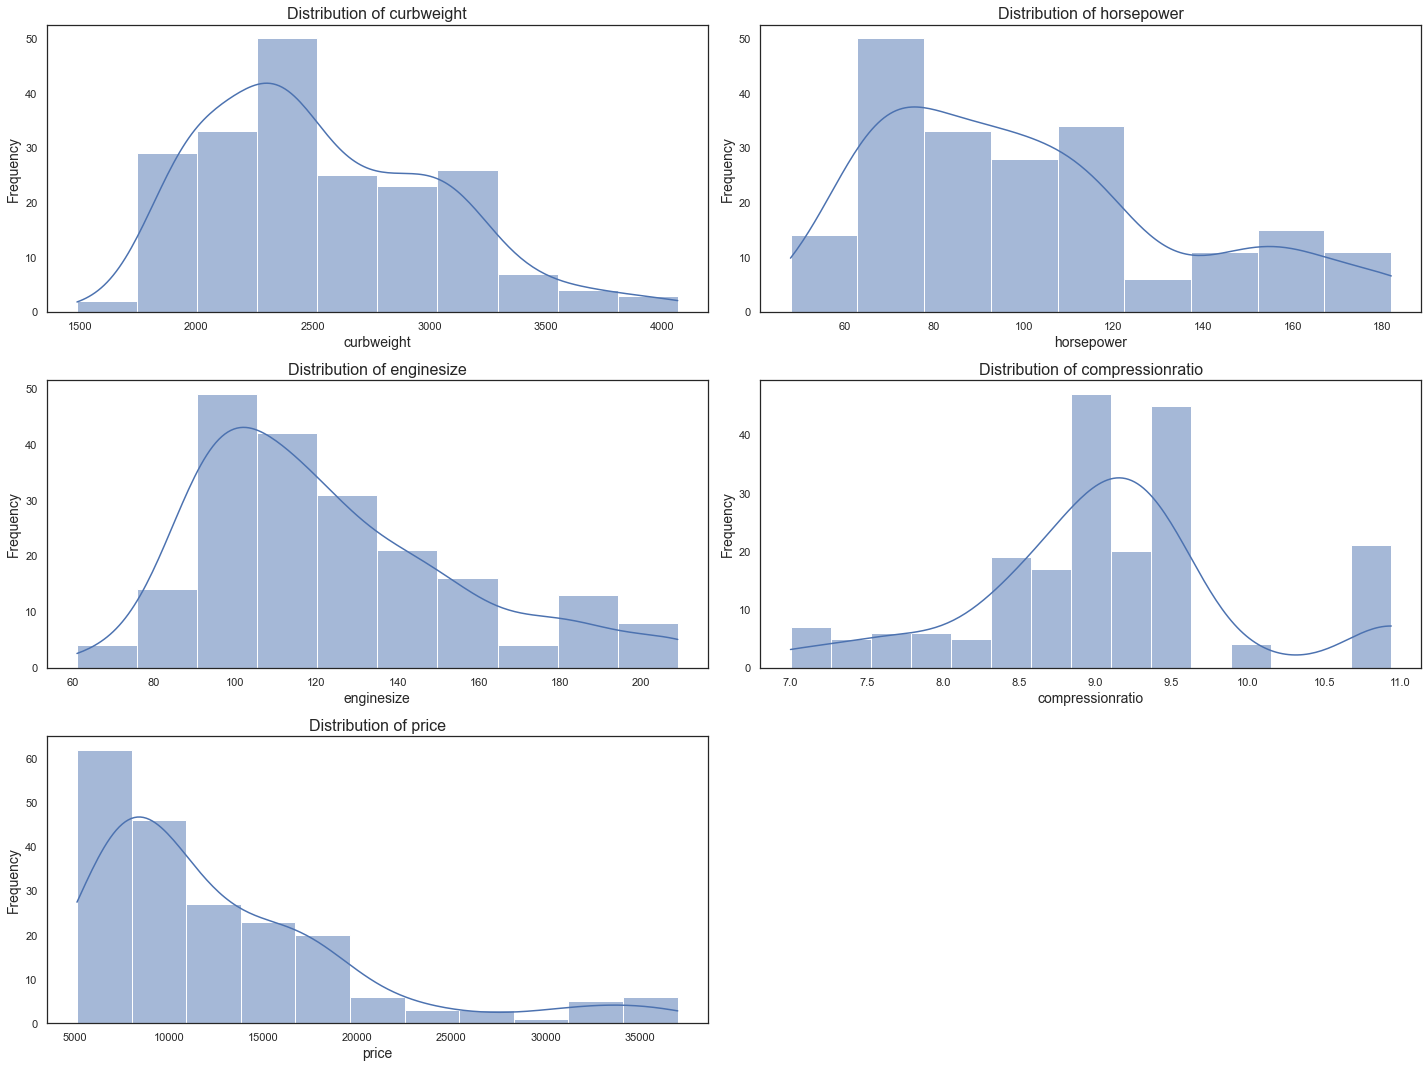

In [413]:
df= df[np.abs(df.price-df.price.mean()) <= (3*df.price.std())]
plt.figure(figsize=(20, 15))

variables = ['curbweight', 'horsepower', 'enginesize', 'compressionratio', 'price']

for i, var in enumerate(variables):
    plt.subplot(3, 2, i + 1)  
    sns.histplot(df[var], kde=True)  
    plt.title(f'Distribution of {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

plt.tight_layout() 
plt.show()


In [414]:
# Counting the total number of Companies... 
df['company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
audi            7
plymouth        7
bmw             7
buick           6
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: company, dtype: int64

In [415]:
# Creating the dummy variable for thier conversion in binary
company_var = pd.get_dummies(df['company'])
company_var

Nissan  alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu  \
0         0            1     0    0      0          0      0      0      0   
1         0            1     0    0      0          0      0      0      0   
2         0            1     0    0      0          0      0      0      0   
3         0            0     1    0      0          0      0      0      0   
4         0            0     1    0      0          0      0      0      0   
..      ...          ...   ...  ...    ...        ...    ...    ...    ...   
200       0            0     0    0      0          0      0      0      0   
201       0            0     0    0      0          0      0      0      0   
202       0            0     0    0      0          0      0      0      0   
203       0            0     0    0      0          0      0      0      0   
204       0            0     0    0      0          0      0      0      0   

     jaguar  maxda  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  \
0         0      0      0        0           0       0        0         0   
1         0      0      0        0           0       0        0         0   
2         0      0      0        0           0       0        0         0   
3         0      0      0        0           0       0        0         0   
4         0      0      0        0           0       0        0         0   
..      ...    ...    ...      ...         ...     ...      ...       ...   
200       0      0      0        0           0       0        0         0   
201       0      0      0        0           0       0        0         0   
202       0      0      0        0           0       0        0         0   
203       0      0      0        0           0       0        0         0   
204       0      0      0        0           0       0        0         0   

     porcshce  porsche  renault  saab  subaru  toyota  toyouta  vokswagen  \
0           0        0        0     0       0       0        0          0   
1           0        0        0     0       0       0        0          0   
2           0        0        0     0       0       0        0          0   
3           0        0        0     0       0       0        0          0   
4           0        0        0     0       0       0        0          0   
..        ...      ...      ...   ...     ...     ...      ...        ...   
200         0        0        0     0       0       0        0          0   
201         0        0        0     0       0       0        0          0   
202         0        0        0     0       0       0        0          0   
203         0        0        0     0       0       0        0          0   
204         0        0        0     0       0       0        0          0   

     volkswagen  volvo  vw  
0             0      0   0  
1             0      0   0  
2             0      0   0  
3             0      0   0  
4             0      0   0  
..          ...    ...  ..  
200           0      1   0  
201           0      1   0  
202           0      1   0  
203           0      1   0  
204           0      1   0  

[202 rows x 28 columns]

In [416]:
# dropping the redundant dummy var
company_var = pd.get_dummies(df['company'],drop_first=True)
company_var

alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  \
0              1     0    0      0          0      0      0      0       0   
1              1     0    0      0          0      0      0      0       0   
2              1     0    0      0          0      0      0      0       0   
3              0     1    0      0          0      0      0      0       0   
4              0     1    0      0          0      0      0      0       0   
..           ...   ...  ...    ...        ...    ...    ...    ...     ...   
200            0     0    0      0          0      0      0      0       0   
201            0     0    0      0          0      0      0      0       0   
202            0     0    0      0          0      0      0      0       0   
203            0     0    0      0          0      0      0      0       0   
204            0     0    0      0          0      0      0      0       0   

     maxda  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porcshce  \
0        0      0        0           0       0        0         0         0   
1        0      0        0           0       0        0         0         0   
2        0      0        0           0       0        0         0         0   
3        0      0        0           0       0        0         0         0   
4        0      0        0           0       0        0         0         0   
..     ...    ...      ...         ...     ...      ...       ...       ...   
200      0      0        0           0       0        0         0         0   
201      0      0        0           0       0        0         0         0   
202      0      0        0           0       0        0         0         0   
203      0      0        0           0       0        0         0         0   
204      0      0        0           0       0        0         0         0   

     porsche  renault  saab  subaru  toyota  toyouta  vokswagen  volkswagen  \
0          0        0     0       0       0        0          0           0   
1          0        0     0       0       0        0          0           0   
2          0        0     0       0       0        0          0           0   
3          0        0     0       0       0        0          0           0   
4          0        0     0       0       0        0          0           0   
..       ...      ...   ...     ...     ...      ...        ...         ...   
200        0        0     0       0       0        0          0           0   
201        0        0     0       0       0        0          0           0   
202        0        0     0       0       0        0          0           0   
203        0        0     0       0       0        0          0           0   
204        0        0     0       0       0        0          0           0   

     volvo  vw  
0        0   0  
1        0   0  
2        0   0  
3        0   0  
4        0   0  
..     ...  ..  
200      1   0  
201      1   0  
202      1   0  
203      1   0  
204      1   0  

[202 rows x 27 columns]

In [417]:
# Now since here in columns there is many redundancy like 'porcshce' and 'porsche', 'toyota' and 'toyouta', 
# 'volkswagen'and'volkswagen'and'vw' and also 'maxda' and 'mazda'. Using OR(|) operator...
company_var['porsche'] = company_var['porsche'] | company_var['porcshce']
company_var['toyota'] = company_var['toyota'] | company_var['toyouta'] 
company_var['mazda'] = company_var['mazda'] | company_var['maxda'] 
company_var['volkswagen'] = company_var['vokswagen'] | company_var['volkswagen'] | company_var['vw']

In [418]:
# Now dropping these columns 
company_var = company_var.drop(['porcshce','toyouta','maxda','vokswagen','vw'],axis=1)
company_var

alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  \
0              1     0    0      0          0      0      0      0       0   
1              1     0    0      0          0      0      0      0       0   
2              1     0    0      0          0      0      0      0       0   
3              0     1    0      0          0      0      0      0       0   
4              0     1    0      0          0      0      0      0       0   
..           ...   ...  ...    ...        ...    ...    ...    ...     ...   
200            0     0    0      0          0      0      0      0       0   
201            0     0    0      0          0      0      0      0       0   
202            0     0    0      0          0      0      0      0       0   
203            0     0    0      0          0      0      0      0       0   
204            0     0    0      0          0      0      0      0       0   

     mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  \
0        0        0           0       0        0         0        0        0   
1        0        0           0       0        0         0        0        0   
2        0        0           0       0        0         0        0        0   
3        0        0           0       0        0         0        0        0   
4        0        0           0       0        0         0        0        0   
..     ...      ...         ...     ...      ...       ...      ...      ...   
200      0        0           0       0        0         0        0        0   
201      0        0           0       0        0         0        0        0   
202      0        0           0       0        0         0        0        0   
203      0        0           0       0        0         0        0        0   
204      0        0           0       0        0         0        0        0   

     saab  subaru  toyota  volkswagen  volvo  
0       0       0       0           0      0  
1       0       0       0           0      0  
2       0       0       0           0      0  
3       0       0       0           0      0  
4       0       0       0           0      0  
..    ...     ...     ...         ...    ...  
200     0       0       0           0      1  
201     0       0       0           0      1  
202     0       0       0           0      1  
203     0       0       0           0      1  
204     0       0       0           0      1  

[202 rows x 22 columns]

In [419]:
# Since we have successfully dropped all the redundant columns now we will merge company_var with df

df = pd.concat([df,company_var],axis=1)
df

symboling fueltype aspiration doornumber      carbody drivewheel  \
0       risky      gas        std        two  convertible        rwd   
1       risky      gas        std        two  convertible        rwd   
2    moderate      gas        std        two    hatchback        rwd   
3       risky      gas        std       four        sedan        fwd   
4       risky      gas        std       four        sedan        4wd   
..        ...      ...        ...        ...          ...        ...   
200      safe      gas        std       four        sedan        rwd   
201      safe      gas      turbo       four        sedan        rwd   
202      safe      gas        std       four        sedan        rwd   
203      safe   diesel      turbo       four        sedan        rwd   
204      safe      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0            front       88.6      168.8      64.1       48.8        2548   
1            front       88.6      168.8      64.1       48.8        2548   
2            front       94.5      171.2      65.5       52.4        2823   
3            front       99.8      176.6      66.2       54.3        2337   
4            front       99.4      176.6      66.4       54.3        2824   
..             ...        ...        ...       ...        ...         ...   
200          front      109.1      188.8      68.9       55.5        2952   
201          front      109.1      188.8      68.8       55.5        3049   
202          front      109.1      188.8      68.9       55.5        3012   
203          front      109.1      188.8      68.9       55.5        3217   
204          front      109.1      188.8      68.9       55.5        3062   

    enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0         dohc           four         130       mpfi       3.47    2.68   
1         dohc           four         130       mpfi       3.47    2.68   
2         ohcv            six         152       mpfi       2.68    3.47   
3          ohc           four         109       mpfi       3.19    3.40   
4          ohc           five         136       mpfi       3.19    3.40   
..         ...            ...         ...        ...        ...     ...   
200        ohc           four         141       mpfi       3.78    3.15   
201        ohc           four         141       mpfi       3.78    3.15   
202       ohcv            six         173       mpfi       3.58    2.87   
203        ohc            six         145        idi       3.01    3.40   
204        ohc           four         141       mpfi       3.78    3.15   

     compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0                9.00         111     5000       21          27  13495.0   
1                9.00         111     5000       21          27  16500.0   
2                9.00         154     5000       19          26  16500.0   
3               10.00         102     5500       24          30  13950.0   
4                8.00         115     5500       18          22  17450.0   
..                ...         ...      ...      ...         ...      ...   
200              9.50         114     5400       23          28  16845.0   
201              8.70         160     5300       19          25  19045.0   
202              8.80         134     5500       18          23  21485.0   
203             10.94         106     4800       26          27  22470.0   
204              9.50         114     5400       19          25  22625.0   

         company  alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  \
0    alfa-romero            1     0    0      0          0      0      0   
1    alfa-romero            1     0    0      0          0      0      0   
2    alfa-romero            1     0    0      0          0      0      0   
3           audi            0     1    0      0          0      0      0   
4           audi    

In [420]:
# now dropping 'company' from df
df = df.drop(['company'],axis=1)
df

symboling fueltype aspiration doornumber      carbody drivewheel  \
0       risky      gas        std        two  convertible        rwd   
1       risky      gas        std        two  convertible        rwd   
2    moderate      gas        std        two    hatchback        rwd   
3       risky      gas        std       four        sedan        fwd   
4       risky      gas        std       four        sedan        4wd   
..        ...      ...        ...        ...          ...        ...   
200      safe      gas        std       four        sedan        rwd   
201      safe      gas      turbo       four        sedan        rwd   
202      safe      gas        std       four        sedan        rwd   
203      safe   diesel      turbo       four        sedan        rwd   
204      safe      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0            front       88.6      168.8      64.1       48.8        2548   
1            front       88.6      168.8      64.1       48.8        2548   
2            front       94.5      171.2      65.5       52.4        2823   
3            front       99.8      176.6      66.2       54.3        2337   
4            front       99.4      176.6      66.4       54.3        2824   
..             ...        ...        ...       ...        ...         ...   
200          front      109.1      188.8      68.9       55.5        2952   
201          front      109.1      188.8      68.8       55.5        3049   
202          front      109.1      188.8      68.9       55.5        3012   
203          front      109.1      188.8      68.9       55.5        3217   
204          front      109.1      188.8      68.9       55.5        3062   

    enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0         dohc           four         130       mpfi       3.47    2.68   
1         dohc           four         130       mpfi       3.47    2.68   
2         ohcv            six         152       mpfi       2.68    3.47   
3          ohc           four         109       mpfi       3.19    3.40   
4          ohc           five         136       mpfi       3.19    3.40   
..         ...            ...         ...        ...        ...     ...   
200        ohc           four         141       mpfi       3.78    3.15   
201        ohc           four         141       mpfi       3.78    3.15   
202       ohcv            six         173       mpfi       3.58    2.87   
203        ohc            six         145        idi       3.01    3.40   
204        ohc           four         141       mpfi       3.78    3.15   

     compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0                9.00         111     5000       21          27  13495.0   
1                9.00         111     5000       21          27  16500.0   
2                9.00         154     5000       19          26  16500.0   
3               10.00         102     5500       24          30  13950.0   
4                8.00         115     5500       18          22  17450.0   
..                ...         ...      ...      ...         ...      ...   
200              9.50         114     5400       23          28  16845.0   
201              8.70         160     5300       19          25  19045.0   
202              8.80         134     5500       18          23  21485.0   
203             10.94         106     4800       26          27  22470.0   
204              9.50         114     5400       19          25  22625.0   

     alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  \
0              1     0    0      0          0      0      0      0       0   
1              1     0    0      0          0      0      0      0       0   
2              1     0    0      0          0      0      0      0       0   
3              0     1    0      0          0      0      0      0       0   
4         

In [421]:
# Now "Fueltype"... Checking the types and taking their count
df['fueltype'].value_counts()

gas       182
diesel     20
Name: fueltype, dtype: int64

In [422]:
# Now we will give 0 for 'gas' and 1 for diesel

df['fueltype'] = df['fueltype'].map({'gas':1,'diesel':0})
df.head()

symboling  fueltype aspiration doornumber      carbody drivewheel  \
0     risky         1        std        two  convertible        rwd   
1     risky         1        std        two  convertible        rwd   
2  moderate         1        std        two    hatchback        rwd   
3     risky         1        std       four        sedan        fwd   
4     risky         1        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0       dohc           four         130       mpfi       3.47    2.68   
1       dohc           four         130       mpfi       3.47    2.68   
2       ohcv            six         152       mpfi       2.68    3.47   
3        ohc           four         109       mpfi       3.19    3.40   
4        ohc           five         136       mpfi       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

   alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  \
0            1     0    0      0          0      0      0      0       0   
1            1     0    0      0          0      0      0      0       0   
2            1     0    0      0          0      0      0      0       0   
3            0     1    0      0          0      0      0      0       0   
4            0     1    0      0          0      0      0      0       0   

   mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  \
0      0        0           0       0        0         0        0        0   
1      0        0           0       0        0         0        0        0   
2      0        0           0       0        0         0        0        0   
3      0        0           0       0        0         0        0        0   
4      0        0           0       0        0         0        0        0   

   saab  subaru  toyota  volkswagen  volvo  
0     0       0       0           0      0  
1     0       0       0           0      0  
2     0       0       0           0      0  
3     0       0       0           0      0  
4     0       0       0           0      0

In [423]:
# Now for "aspiration"... Checking the types and taking their count
df['aspiration'].value_counts()

std      165
turbo     37
Name: aspiration, dtype: int64

In [424]:
# Now giving 1 for "std" and 0 for "turbo"
df['aspiration'] = df['aspiration'].map({'std':1,'turbo':0})
df.head()

symboling  fueltype  aspiration doornumber      carbody drivewheel  \
0     risky         1           1        two  convertible        rwd   
1     risky         1           1        two  convertible        rwd   
2  moderate         1           1        two    hatchback        rwd   
3     risky         1           1       four        sedan        fwd   
4     risky         1           1       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0       dohc           four         130       mpfi       3.47    2.68   
1       dohc           four         130       mpfi       3.47    2.68   
2       ohcv            six         152       mpfi       2.68    3.47   
3        ohc           four         109       mpfi       3.19    3.40   
4        ohc           five         136       mpfi       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

   alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  \
0            1     0    0      0          0      0      0      0       0   
1            1     0    0      0          0      0      0      0       0   
2            1     0    0      0          0      0      0      0       0   
3            0     1    0      0          0      0      0      0       0   
4            0     1    0      0          0      0      0      0       0   

   mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  \
0      0        0           0       0        0         0        0        0   
1      0        0           0       0        0         0        0        0   
2      0        0           0       0        0         0        0        0   
3      0        0           0       0        0         0        0        0   
4      0        0           0       0        0         0        0        0   

   saab  subaru  toyota  volkswagen  volvo  
0     0       0       0           0      0  
1     0       0       0           0      0  
2     0       0       0           0      0  
3     0       0       0           0      0  
4     0       0       0           0      0

In [425]:
# For "doornumber"... 
df['doornumber'].value_counts()

four    114
two      88
Name: doornumber, dtype: int64

In [426]:
# cno  1- four  0 -two
df['doornumber']=df['doornumber'].map({'four':1,'two':0})
df.head()

symboling  fueltype  aspiration  doornumber      carbody drivewheel  \
0     risky         1           1           0  convertible        rwd   
1     risky         1           1           0  convertible        rwd   
2  moderate         1           1           0    hatchback        rwd   
3     risky         1           1           1        sedan        fwd   
4     risky         1           1           1        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0       dohc           four         130       mpfi       3.47    2.68   
1       dohc           four         130       mpfi       3.47    2.68   
2       ohcv            six         152       mpfi       2.68    3.47   
3        ohc           four         109       mpfi       3.19    3.40   
4        ohc           five         136       mpfi       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0               9.0         111     5000       21          27  13495.0   
1               9.0         111     5000       21          27  16500.0   
2               9.0         154     5000       19          26  16500.0   
3              10.0         102     5500       24          30  13950.0   
4               8.0         115     5500       18          22  17450.0   

   alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  \
0            1     0    0      0          0      0      0      0       0   
1            1     0    0      0          0      0      0      0       0   
2            1     0    0      0          0      0      0      0       0   
3            0     1    0      0          0      0      0      0       0   
4            0     1    0      0          0      0      0      0       0   

   mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  \
0      0        0           0       0        0         0        0        0   
1      0        0           0       0        0         0        0        0   
2      0        0           0       0        0         0        0        0   
3      0        0           0       0        0         0        0        0   
4      0        0           0       0        0         0        0        0   

   saab  subaru  toyota  volkswagen  volvo  
0     0       0       0           0      0  
1     0       0       0           0      0  
2     0       0       0           0      0  
3     0       0       0           0      0  
4     0       0       0           0      0

In [427]:
# carbody
df['carbody'].value_counts()

sedan          94
hatchback      70
wagon          25
hardtop         7
convertible     6
Name: carbody, dtype: int64

In [428]:
# giving dummy

carbody = pd.get_dummies(df['carbody'],drop_first=True)
carbody.head()

hardtop  hatchback  sedan  wagon
0        0          0      0      0
1        0          0      0      0
2        0          1      0      0
3        0          0      1      0
4        0          0      1      0

In [429]:
# concatinating with original

df = pd.concat([df,carbody],axis=1)
df

symboling  fueltype  aspiration  doornumber      carbody drivewheel  \
0       risky         1           1           0  convertible        rwd   
1       risky         1           1           0  convertible        rwd   
2    moderate         1           1           0    hatchback        rwd   
3       risky         1           1           1        sedan        fwd   
4       risky         1           1           1        sedan        4wd   
..        ...       ...         ...         ...          ...        ...   
200      safe         1           1           1        sedan        rwd   
201      safe         1           0           1        sedan        rwd   
202      safe         1           1           1        sedan        rwd   
203      safe         0           0           1        sedan        rwd   
204      safe         1           0           1        sedan        rwd   

    enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0            front       88.6      168.8      64.1       48.8        2548   
1            front       88.6      168.8      64.1       48.8        2548   
2            front       94.5      171.2      65.5       52.4        2823   
3            front       99.8      176.6      66.2       54.3        2337   
4            front       99.4      176.6      66.4       54.3        2824   
..             ...        ...        ...       ...        ...         ...   
200          front      109.1      188.8      68.9       55.5        2952   
201          front      109.1      188.8      68.8       55.5        3049   
202          front      109.1      188.8      68.9       55.5        3012   
203          front      109.1      188.8      68.9       55.5        3217   
204          front      109.1      188.8      68.9       55.5        3062   

    enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0         dohc           four         130       mpfi       3.47    2.68   
1         dohc           four         130       mpfi       3.47    2.68   
2         ohcv            six         152       mpfi       2.68    3.47   
3          ohc           four         109       mpfi       3.19    3.40   
4          ohc           five         136       mpfi       3.19    3.40   
..         ...            ...         ...        ...        ...     ...   
200        ohc           four         141       mpfi       3.78    3.15   
201        ohc           four         141       mpfi       3.78    3.15   
202       ohcv            six         173       mpfi       3.58    2.87   
203        ohc            six         145        idi       3.01    3.40   
204        ohc           four         141       mpfi       3.78    3.15   

     compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0                9.00         111     5000       21          27  13495.0   
1                9.00         111     5000       21          27  16500.0   
2                9.00         154     5000       19          26  16500.0   
3               10.00         102     5500       24          30  13950.0   
4                8.00         115     5500       18          22  17450.0   
..                ...         ...      ...      ...         ...      ...   
200              9.50         114     5400       23          28  16845.0   
201              8.70         160     5300       19          25  19045.0   
202              8.80         134     5500       18          23  21485.0   
203             10.94         106     4800       26          27  22470.0   
204              9.50         114     5400       19          25  22625.0   

     alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  \
0              1     0    0      0          0      0      0      0       0   
1              1     0    0      0          0      0      0      0       0   
2              1     0    0      0          0      0      0      0       0   
3              0     1    0      0          0      0

In [430]:
# dropping column = carbody
df.drop(['carbody'],axis=1,inplace=True)
df.head()

symboling  fueltype  aspiration  doornumber drivewheel enginelocation  \
0     risky         1           1           0        rwd          front   
1     risky         1           1           0        rwd          front   
2  moderate         1           1           0        rwd          front   
3     risky         1           1           1        fwd          front   
4     risky         1           1           1        4wd          front   

   wheelbase  carlength  carwidth  carheight  curbweight enginetype  \
0       88.6      168.8      64.1       48.8        2548       dohc   
1       88.6      168.8      64.1       48.8        2548       dohc   
2       94.5      171.2      65.5       52.4        2823       ohcv   
3       99.8      176.6      66.2       54.3        2337        ohc   
4       99.4      176.6      66.4       54.3        2824        ohc   

  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  \
0           four         130       mpfi       3.47    2.68               9.0   
1           four         130       mpfi       3.47    2.68               9.0   
2            six         152       mpfi       2.68    3.47               9.0   
3           four         109       mpfi       3.19    3.40              10.0   
4           five         136       mpfi       3.19    3.40               8.0   

   horsepower  peakrpm  citympg  highwaympg    price  alfa-romero  audi  bmw  \
0         111     5000       21          27  13495.0            1     0    0   
1         111     5000       21          27  16500.0            1     0    0   
2         154     5000       19          26  16500.0            1     0    0   
3         102     5500       24          30  13950.0            0     1    0   
4         115     5500       18          22  17450.0            0     1    0   

   buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  \
0      0          0      0      0      0       0      0        0           0   
1      0          0      0      0      0       0      0        0           0   
2      0          0      0      0      0       0      0        0           0   
3      0          0      0      0      0       0      0        0           0   
4      0          0      0      0      0       0      0        0           0   

   nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  \
0       0        0         0        0        0     0       0       0   
1       0        0         0        0        0     0       0       0   
2       0        0         0        0        0     0       0       0   
3       0        0         0        0        0     0       0       0   
4       0        0         0        0        0     0       0       0   

   volkswagen  volvo  hardtop  hatchback  sedan  wagon  
0           0      0        0          0      0      0  
1           0      0        0          0      0      0  
2           0      0        0          1      0      0  
3           0      0        0          0      1      0  
4           0      0        0          0      1      0

In [431]:
# Now for drivewheel
df['drivewheel'].value_counts()

fwd    120
rwd     73
4wd      9
Name: drivewheel, dtype: int64

In [432]:
# creatiing dummy variable for drivewheel
drivewheel_var = pd.get_dummies( df['drivewheel'])
drivewheel_var

4wd  fwd  rwd
0      0    0    1
1      0    0    1
2      0    0    1
3      0    1    0
4      1    0    0
..   ...  ...  ...
200    0    0    1
201    0    0    1
202    0    0    1
203    0    0    1
204    0    0    1

[202 rows x 3 columns]

In [433]:
drivewheel_var = pd.get_dummies( df['drivewheel'],drop_first=True)
drivewheel_var

fwd  rwd
0      0    1
1      0    1
2      0    1
3      1    0
4      0    0
..   ...  ...
200    0    1
201    0    1
202    0    1
203    0    1
204    0    1

[202 rows x 2 columns]

In [434]:
# Concatinating drivewheel_var with dataset
df = pd.concat([df,drivewheel_var],axis=1)
df

symboling  fueltype  aspiration  doornumber drivewheel enginelocation  \
0       risky         1           1           0        rwd          front   
1       risky         1           1           0        rwd          front   
2    moderate         1           1           0        rwd          front   
3       risky         1           1           1        fwd          front   
4       risky         1           1           1        4wd          front   
..        ...       ...         ...         ...        ...            ...   
200      safe         1           1           1        rwd          front   
201      safe         1           0           1        rwd          front   
202      safe         1           1           1        rwd          front   
203      safe         0           0           1        rwd          front   
204      safe         1           0           1        rwd          front   

     wheelbase  carlength  carwidth  carheight  curbweight enginetype  \
0         88.6      168.8      64.1       48.8        2548       dohc   
1         88.6      168.8      64.1       48.8        2548       dohc   
2         94.5      171.2      65.5       52.4        2823       ohcv   
3         99.8      176.6      66.2       54.3        2337        ohc   
4         99.4      176.6      66.4       54.3        2824        ohc   
..         ...        ...       ...        ...         ...        ...   
200      109.1      188.8      68.9       55.5        2952        ohc   
201      109.1      188.8      68.8       55.5        3049        ohc   
202      109.1      188.8      68.9       55.5        3012       ohcv   
203      109.1      188.8      68.9       55.5        3217        ohc   
204      109.1      188.8      68.9       55.5        3062        ohc   

    cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0             four         130       mpfi       3.47    2.68   
1             four         130       mpfi       3.47    2.68   
2              six         152       mpfi       2.68    3.47   
3             four         109       mpfi       3.19    3.40   
4             five         136       mpfi       3.19    3.40   
..             ...         ...        ...        ...     ...   
200           four         141       mpfi       3.78    3.15   
201           four         141       mpfi       3.78    3.15   
202            six         173       mpfi       3.58    2.87   
203            six         145        idi       3.01    3.40   
204           four         141       mpfi       3.78    3.15   

     compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0                9.00         111     5000       21          27  13495.0   
1                9.00         111     5000       21          27  16500.0   
2                9.00         154     5000       19          26  16500.0   
3               10.00         102     5500       24          30  13950.0   
4                8.00         115     5500       18          22  17450.0   
..                ...         ...      ...      ...         ...      ...   
200              9.50         114     5400       23          28  16845.0   
201              8.70         160     5300       19          25  19045.0   
202              8.80         134     5500       18          23  21485.0   
203             10.94         106     4800       26          27  22470.0   
204              9.50         114     5400       19          25  22625.0   

     alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  \
0              1     0    0      0          0      0      0      0       0   
1              1     0    0      0          0      0      0      0       0   
2              1     0    0      0          0      0      0      0       0   
3              0     1    0      0          0      0      0      0       0   
4              0     1    0      0          0      0      0      0       0   
..           ...   ...  ...    ...        ...    ...

In [435]:
# dropping column = drivewheel
df.drop(['drivewheel'],axis=1,inplace=True)
df.head()

symboling  fueltype  aspiration  doornumber enginelocation  wheelbase  \
0     risky         1           1           0          front       88.6   
1     risky         1           1           0          front       88.6   
2  moderate         1           1           0          front       94.5   
3     risky         1           1           1          front       99.8   
4     risky         1           1           1          front       99.4   

   carlength  carwidth  carheight  curbweight enginetype cylindernumber  \
0      168.8      64.1       48.8        2548       dohc           four   
1      168.8      64.1       48.8        2548       dohc           four   
2      171.2      65.5       52.4        2823       ohcv            six   
3      176.6      66.2       54.3        2337        ohc           four   
4      176.6      66.4       54.3        2824        ohc           five   

   enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  \
0         130       mpfi       3.47    2.68               9.0         111   
1         130       mpfi       3.47    2.68               9.0         111   
2         152       mpfi       2.68    3.47               9.0         154   
3         109       mpfi       3.19    3.40              10.0         102   
4         136       mpfi       3.19    3.40               8.0         115   

   peakrpm  citympg  highwaympg    price  alfa-romero  audi  bmw  buick  \
0     5000       21          27  13495.0            1     0    0      0   
1     5000       21          27  16500.0            1     0    0      0   
2     5000       19          26  16500.0            1     0    0      0   
3     5500       24          30  13950.0            0     1    0      0   
4     5500       18          22  17450.0            0     1    0      0   

   chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  \
0          0      0      0      0       0      0        0           0       0   
1          0      0      0      0       0      0        0           0       0   
2          0      0      0      0       0      0        0           0       0   
3          0      0      0      0       0      0        0           0       0   
4          0      0      0      0       0      0        0           0       0   

   peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  \
0        0         0        0        0     0       0       0           0   
1        0         0        0        0     0       0       0           0   
2        0         0        0        0     0       0       0           0   
3        0         0        0        0     0       0       0           0   
4        0         0        0        0     0       0       0           0   

   volvo  hardtop  hatchback  sedan  wagon  fwd  rwd  
0      0        0          0      0      0    0    1  
1      0        0          0      0      0    0    1  
2      0        0          1      0      0    0    1  
3      0        0          0      1      0    1    0  
4      0        0          0      1      0    0    0

In [436]:
# For enginelocation
df['enginelocation'].value_counts()

front    199
rear       3
Name: enginelocation, dtype: int64

In [437]:
df['enginelocation'] = df['enginelocation'].map({'front':1,'rear':0})
df.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0     risky         1           1           0               1       88.6   
1     risky         1           1           0               1       88.6   
2  moderate         1           1           0               1       94.5   
3     risky         1           1           1               1       99.8   
4     risky         1           1           1               1       99.4   

   carlength  carwidth  carheight  curbweight enginetype cylindernumber  \
0      168.8      64.1       48.8        2548       dohc           four   
1      168.8      64.1       48.8        2548       dohc           four   
2      171.2      65.5       52.4        2823       ohcv            six   
3      176.6      66.2       54.3        2337        ohc           four   
4      176.6      66.4       54.3        2824        ohc           five   

   enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  \
0         130       mpfi       3.47    2.68               9.0         111   
1         130       mpfi       3.47    2.68               9.0         111   
2         152       mpfi       2.68    3.47               9.0         154   
3         109       mpfi       3.19    3.40              10.0         102   
4         136       mpfi       3.19    3.40               8.0         115   

   peakrpm  citympg  highwaympg    price  alfa-romero  audi  bmw  buick  \
0     5000       21          27  13495.0            1     0    0      0   
1     5000       21          27  16500.0            1     0    0      0   
2     5000       19          26  16500.0            1     0    0      0   
3     5500       24          30  13950.0            0     1    0      0   
4     5500       18          22  17450.0            0     1    0      0   

   chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  \
0          0      0      0      0       0      0        0           0       0   
1          0      0      0      0       0      0        0           0       0   
2          0      0      0      0       0      0        0           0       0   
3          0      0      0      0       0      0        0           0       0   
4          0      0      0      0       0      0        0           0       0   

   peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  \
0        0         0        0        0     0       0       0           0   
1        0         0        0        0     0       0       0           0   
2        0         0        0        0     0       0       0           0   
3        0         0        0        0     0       0       0           0   
4        0         0        0        0     0       0       0           0   

   volvo  hardtop  hatchback  sedan  wagon  fwd  rwd  
0      0        0          0      0      0    0    1  
1      0        0          0      0      0    0    1  
2      0        0          1      0      0    0    1  
3      0        0          0      1      0    1    0  
4      0        0          0      1      0    0    0

In [438]:
# Now for enginetype
# df.info()
df['enginetype'].value_counts()

ohc      147
ohcf      15
dohc      12
l         12
ohcv      11
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [439]:
# creating a dummy var
type = pd.get_dummies(df['enginetype'])
type

dohc  dohcv  l  ohc  ohcf  ohcv  rotor
0       1      0  0    0     0     0      0
1       1      0  0    0     0     0      0
2       0      0  0    0     0     1      0
3       0      0  0    1     0     0      0
4       0      0  0    1     0     0      0
..    ...    ... ..  ...   ...   ...    ...
200     0      0  0    1     0     0      0
201     0      0  0    1     0     0      0
202     0      0  0    0     0     1      0
203     0      0  0    1     0     0      0
204     0      0  0    1     0     0      0

[202 rows x 7 columns]

In [440]:
# dropping dohcv from type
type = type.drop(['dohcv'],axis=1)
type

dohc  l  ohc  ohcf  ohcv  rotor
0       1  0    0     0     0      0
1       1  0    0     0     0      0
2       0  0    0     0     1      0
3       0  0    1     0     0      0
4       0  0    1     0     0      0
..    ... ..  ...   ...   ...    ...
200     0  0    1     0     0      0
201     0  0    1     0     0      0
202     0  0    0     0     1      0
203     0  0    1     0     0      0
204     0  0    1     0     0      0

[202 rows x 6 columns]

In [441]:
# concatinating type to dataset
df = pd.concat([df,type],axis=1)
df

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0       risky         1           1           0               1       88.6   
1       risky         1           1           0               1       88.6   
2    moderate         1           1           0               1       94.5   
3       risky         1           1           1               1       99.8   
4       risky         1           1           1               1       99.4   
..        ...       ...         ...         ...             ...        ...   
200      safe         1           1           1               1      109.1   
201      safe         1           0           1               1      109.1   
202      safe         1           1           1               1      109.1   
203      safe         0           0           1               1      109.1   
204      safe         1           0           1               1      109.1   

     carlength  carwidth  carheight  curbweight enginetype cylindernumber  \
0        168.8      64.1       48.8        2548       dohc           four   
1        168.8      64.1       48.8        2548       dohc           four   
2        171.2      65.5       52.4        2823       ohcv            six   
3        176.6      66.2       54.3        2337        ohc           four   
4        176.6      66.4       54.3        2824        ohc           five   
..         ...       ...        ...         ...        ...            ...   
200      188.8      68.9       55.5        2952        ohc           four   
201      188.8      68.8       55.5        3049        ohc           four   
202      188.8      68.9       55.5        3012       ohcv            six   
203      188.8      68.9       55.5        3217        ohc            six   
204      188.8      68.9       55.5        3062        ohc           four   

     enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  \
0           130       mpfi       3.47    2.68              9.00         111   
1           130       mpfi       3.47    2.68              9.00         111   
2           152       mpfi       2.68    3.47              9.00         154   
3           109       mpfi       3.19    3.40             10.00         102   
4           136       mpfi       3.19    3.40              8.00         115   
..          ...        ...        ...     ...               ...         ...   
200         141       mpfi       3.78    3.15              9.50         114   
201         141       mpfi       3.78    3.15              8.70         160   
202         173       mpfi       3.58    2.87              8.80         134   
203         145        idi       3.01    3.40             10.94         106   
204         141       mpfi       3.78    3.15              9.50         114   

     peakrpm  citympg  highwaympg    price  alfa-romero  audi  bmw  buick  \
0       5000       21          27  13495.0            1     0    0      0   
1       5000       21          27  16500.0            1     0    0      0   
2       5000       19          26  16500.0            1     0    0      0   
3       5500       24          30  13950.0            0     1    0      0   
4       5500       18          22  17450.0            0     1    0      0   
..       ...      ...         ...      ...          ...   ...  ...    ...   
200     5400       23          28  16845.0            0     0    0      0   
201     5300       19          25  19045.0            0     0    0      0   
202     5500       18          23  21485.0            0     0    0      0   
203     4800       26          27  22470.0            0     0    0      0   
204     5400       19          25  22625.0            0     0    0      0   

     chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  \
0            0      0      0      0       0      0        0           0   
1            0      0      0      0       0      0        0           0   
2            0      0      0      0       0

In [442]:
# now dropping enginetype from df
df = df.drop(['enginetype'],axis=1)
df.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0     risky         1           1           0               1       88.6   
1     risky         1           1           0               1       88.6   
2  moderate         1           1           0               1       94.5   
3     risky         1           1           1               1       99.8   
4     risky         1           1           1               1       99.4   

   carlength  carwidth  carheight  curbweight cylindernumber  enginesize  \
0      168.8      64.1       48.8        2548           four         130   
1      168.8      64.1       48.8        2548           four         130   
2      171.2      65.5       52.4        2823            six         152   
3      176.6      66.2       54.3        2337           four         109   
4      176.6      66.4       54.3        2824           five         136   

  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0       mpfi       3.47    2.68               9.0         111     5000   
1       mpfi       3.47    2.68               9.0         111     5000   
2       mpfi       2.68    3.47               9.0         154     5000   
3       mpfi       3.19    3.40              10.0         102     5500   
4       mpfi       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  alfa-romero  audi  bmw  buick  chevrolet  \
0       21          27  13495.0            1     0    0      0          0   
1       21          27  16500.0            1     0    0      0          0   
2       19          26  16500.0            1     0    0      0          0   
3       24          30  13950.0            0     1    0      0          0   
4       18          22  17450.0            0     1    0      0          0   

   dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  \
0      0      0      0       0      0        0           0       0        0   
1      0      0      0       0      0        0           0       0        0   
2      0      0      0       0      0        0           0       0        0   
3      0      0      0       0      0        0           0       0        0   
4      0      0      0       0      0        0           0       0        0   

   plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  \
0         0        0        0     0       0       0           0      0   
1         0        0        0     0       0       0           0      0   
2         0        0        0     0       0       0           0      0   
3         0        0        0     0       0       0           0      0   
4         0        0        0     0       0       0           0      0   

   hardtop  hatchback  sedan  wagon  fwd  rwd  dohc  l  ohc  ohcf  ohcv  rotor  
0        0          0      0      0    0    1     1  0    0     0     0      0  
1        0          0      0      0    0    1     1  0    0     0     0      0  
2        0          1      0      0    0    1     0  0    0     0     1      0  
3        0          0      1      0    1    0     0  0    1     0     0      0  
4        0          0      1      0    0    0     0  0    1     0     0      0

In [443]:
df.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0     risky         1           1           0               1       88.6   
1     risky         1           1           0               1       88.6   
2  moderate         1           1           0               1       94.5   
3     risky         1           1           1               1       99.8   
4     risky         1           1           1               1       99.4   

   carlength  carwidth  carheight  curbweight cylindernumber  enginesize  \
0      168.8      64.1       48.8        2548           four         130   
1      168.8      64.1       48.8        2548           four         130   
2      171.2      65.5       52.4        2823            six         152   
3      176.6      66.2       54.3        2337           four         109   
4      176.6      66.4       54.3        2824           five         136   

  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0       mpfi       3.47    2.68               9.0         111     5000   
1       mpfi       3.47    2.68               9.0         111     5000   
2       mpfi       2.68    3.47               9.0         154     5000   
3       mpfi       3.19    3.40              10.0         102     5500   
4       mpfi       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  alfa-romero  audi  bmw  buick  chevrolet  \
0       21          27  13495.0            1     0    0      0          0   
1       21          27  16500.0            1     0    0      0          0   
2       19          26  16500.0            1     0    0      0          0   
3       24          30  13950.0            0     1    0      0          0   
4       18          22  17450.0            0     1    0      0          0   

   dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  \
0      0      0      0       0      0        0           0       0        0   
1      0      0      0       0      0        0           0       0        0   
2      0      0      0       0      0        0           0       0        0   
3      0      0      0       0      0        0           0       0        0   
4      0      0      0       0      0        0           0       0        0   

   plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  \
0         0        0        0     0       0       0           0      0   
1         0        0        0     0       0       0           0      0   
2         0        0        0     0       0       0           0      0   
3         0        0        0     0       0       0           0      0   
4         0        0        0     0       0       0           0      0   

   hardtop  hatchback  sedan  wagon  fwd  rwd  dohc  l  ohc  ohcf  ohcv  rotor  
0        0          0      0      0    0    1     1  0    0     0     0      0  
1        0          0      0      0    0    1     1  0    0     0     0      0  
2        0          1      0      0    0    1     0  0    0     0     1      0  
3        0          0      1      0    1    0     0  0    1     0     0      0  
4        0          0      1      0    0    0     0  0    1     0     0      0

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 204
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         202 non-null    object 
 1   fueltype          202 non-null    int64  
 2   aspiration        202 non-null    int64  
 3   doornumber        202 non-null    int64  
 4   enginelocation    202 non-null    int64  
 5   wheelbase         202 non-null    float64
 6   carlength         202 non-null    float64
 7   carwidth          202 non-null    float64
 8   carheight         202 non-null    float64
 9   curbweight        202 non-null    int64  
 10  cylindernumber    202 non-null    object 
 11  enginesize        202 non-null    int64  
 12  fuelsystem        202 non-null    object 
 13  boreratio         202 non-null    float64
 14  stroke            202 non-null    float64
 15  compressionratio  202 non-null    float64
 16  horsepower        202 non-null    int64  
 1

In [445]:
# now for cylindernumber
df['cylindernumber'].value_counts()

four      159
six        23
five       11
two         4
eight       3
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [446]:
# creating dummy var
number = pd.get_dummies(df['cylindernumber'])
number

eight  five  four  six  three  twelve  two
0        0     0     1    0      0       0    0
1        0     0     1    0      0       0    0
2        0     0     0    1      0       0    0
3        0     0     1    0      0       0    0
4        0     1     0    0      0       0    0
..     ...   ...   ...  ...    ...     ...  ...
200      0     0     1    0      0       0    0
201      0     0     1    0      0       0    0
202      0     0     0    1      0       0    0
203      0     0     0    1      0       0    0
204      0     0     1    0      0       0    0

[202 rows x 7 columns]

In [447]:
# Since three and twelve have minimum number of values so dropping twelve from number
number = number.drop(['twelve'],axis=1)
number

eight  five  four  six  three  two
0        0     0     1    0      0    0
1        0     0     1    0      0    0
2        0     0     0    1      0    0
3        0     0     1    0      0    0
4        0     1     0    0      0    0
..     ...   ...   ...  ...    ...  ...
200      0     0     1    0      0    0
201      0     0     1    0      0    0
202      0     0     0    1      0    0
203      0     0     0    1      0    0
204      0     0     1    0      0    0

[202 rows x 6 columns]

In [448]:
# concatinating it with df
df = pd.concat([df,number],axis=1)
df.head()

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0     risky         1           1           0               1       88.6   
1     risky         1           1           0               1       88.6   
2  moderate         1           1           0               1       94.5   
3     risky         1           1           1               1       99.8   
4     risky         1           1           1               1       99.4   

   carlength  carwidth  carheight  curbweight cylindernumber  enginesize  \
0      168.8      64.1       48.8        2548           four         130   
1      168.8      64.1       48.8        2548           four         130   
2      171.2      65.5       52.4        2823            six         152   
3      176.6      66.2       54.3        2337           four         109   
4      176.6      66.4       54.3        2824           five         136   

  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0       mpfi       3.47    2.68               9.0         111     5000   
1       mpfi       3.47    2.68               9.0         111     5000   
2       mpfi       2.68    3.47               9.0         154     5000   
3       mpfi       3.19    3.40              10.0         102     5500   
4       mpfi       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  alfa-romero  audi  bmw  buick  chevrolet  \
0       21          27  13495.0            1     0    0      0          0   
1       21          27  16500.0            1     0    0      0          0   
2       19          26  16500.0            1     0    0      0          0   
3       24          30  13950.0            0     1    0      0          0   
4       18          22  17450.0            0     1    0      0          0   

   dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  \
0      0      0      0       0      0        0           0       0        0   
1      0      0      0       0      0        0           0       0        0   
2      0      0      0       0      0        0           0       0        0   
3      0      0      0       0      0        0           0       0        0   
4      0      0      0       0      0        0           0       0        0   

   plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  \
0         0        0        0     0       0       0           0      0   
1         0        0        0     0       0       0           0      0   
2         0        0        0     0       0       0           0      0   
3         0        0        0     0       0       0           0      0   
4         0        0        0     0       0       0           0      0   

   hardtop  hatchback  sedan  wagon  fwd  rwd  dohc  l  ohc  ohcf  ohcv  \
0        0          0      0      0    0    1     1  0    0     0     0   
1        0          0      0      0    0    1     1  0    0     0     0   
2        0          1      0      0    0    1     0  0    0     0     1   
3        0          0      1      0    1    0     0  0    1     0     0   
4        0          0      1      0    0    0     0  0    1     0     0   

   rotor  eight  five  four  six  three  two  
0      0      0     0     1    0      0    0  
1      0      0     0     1    0      0    0  
2      0      0     0     0    1      0    0  
3      0      0     0     1    0      0    0  
4      0      0     1     0    0      0    0

In [449]:
# Now dropping cylindernumber from df
df = df.drop(['cylindernumber'],axis=1)
df

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0       risky         1           1           0               1       88.6   
1       risky         1           1           0               1       88.6   
2    moderate         1           1           0               1       94.5   
3       risky         1           1           1               1       99.8   
4       risky         1           1           1               1       99.4   
..        ...       ...         ...         ...             ...        ...   
200      safe         1           1           1               1      109.1   
201      safe         1           0           1               1      109.1   
202      safe         1           1           1               1      109.1   
203      safe         0           0           1               1      109.1   
204      safe         1           0           1               1      109.1   

     carlength  carwidth  carheight  curbweight  enginesize fuelsystem  \
0        168.8      64.1       48.8        2548         130       mpfi   
1        168.8      64.1       48.8        2548         130       mpfi   
2        171.2      65.5       52.4        2823         152       mpfi   
3        176.6      66.2       54.3        2337         109       mpfi   
4        176.6      66.4       54.3        2824         136       mpfi   
..         ...       ...        ...         ...         ...        ...   
200      188.8      68.9       55.5        2952         141       mpfi   
201      188.8      68.8       55.5        3049         141       mpfi   
202      188.8      68.9       55.5        3012         173       mpfi   
203      188.8      68.9       55.5        3217         145        idi   
204      188.8      68.9       55.5        3062         141       mpfi   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0         3.47    2.68              9.00         111     5000       21   
1         3.47    2.68              9.00         111     5000       21   
2         2.68    3.47              9.00         154     5000       19   
3         3.19    3.40             10.00         102     5500       24   
4         3.19    3.40              8.00         115     5500       18   
..         ...     ...               ...         ...      ...      ...   
200       3.78    3.15              9.50         114     5400       23   
201       3.78    3.15              8.70         160     5300       19   
202       3.58    2.87              8.80         134     5500       18   
203       3.01    3.40             10.94         106     4800       26   
204       3.78    3.15              9.50         114     5400       19   

     highwaympg    price  alfa-romero  audi  bmw  buick  chevrolet  dodge  \
0            27  13495.0            1     0    0      0          0      0   
1            27  16500.0            1     0    0      0          0      0   
2            26  16500.0            1     0    0      0          0      0   
3            30  13950.0            0     1    0      0          0      0   
4            22  17450.0            0     1    0      0          0      0   
..          ...      ...          ...   ...  ...    ...        ...    ...   
200          28  16845.0            0     0    0      0          0      0   
201          25  19045.0            0     0    0      0          0      0   
202          23  21485.0            0     0    0      0          0      0   
203          27  22470.0            0     0    0      0          0      0   
204          25  22625.0            0     0    0      0          0      0   

     honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  \
0        0      0       0      0        0           0       0        0   
1        0      0       0      0        0           0       0        0   
2        0      0       0      0        0           0       0        0   
3        0      0       0      0        0           0       0       

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 204
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         202 non-null    object 
 1   fueltype          202 non-null    int64  
 2   aspiration        202 non-null    int64  
 3   doornumber        202 non-null    int64  
 4   enginelocation    202 non-null    int64  
 5   wheelbase         202 non-null    float64
 6   carlength         202 non-null    float64
 7   carwidth          202 non-null    float64
 8   carheight         202 non-null    float64
 9   curbweight        202 non-null    int64  
 10  enginesize        202 non-null    int64  
 11  fuelsystem        202 non-null    object 
 12  boreratio         202 non-null    float64
 13  stroke            202 non-null    float64
 14  compressionratio  202 non-null    float64
 15  horsepower        202 non-null    int64  
 16  peakrpm           202 non-null    int64  
 1

In [451]:
# Now for fuelsystem
df['fuelsystem'].value_counts()

mpfi    91
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [452]:
# creating dummy vars
fuel = pd.get_dummies(df['fuelsystem'])
fuel

1bbl  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
0       0     0     0    0    0     1     0     0
1       0     0     0    0    0     1     0     0
2       0     0     0    0    0     1     0     0
3       0     0     0    0    0     1     0     0
4       0     0     0    0    0     1     0     0
..    ...   ...   ...  ...  ...   ...   ...   ...
200     0     0     0    0    0     1     0     0
201     0     0     0    0    0     1     0     0
202     0     0     0    0    0     1     0     0
203     0     0     0    1    0     0     0     0
204     0     0     0    0    0     1     0     0

[202 rows x 8 columns]

In [453]:
# droppping mfi from fuel
fuel = fuel.drop(['mfi'],axis=1)
fuel.head()

1bbl  2bbl  4bbl  idi  mpfi  spdi  spfi
0     0     0     0    0     1     0     0
1     0     0     0    0     1     0     0
2     0     0     0    0     1     0     0
3     0     0     0    0     1     0     0
4     0     0     0    0     1     0     0

In [454]:
# concatinating fuel with df
df = pd.concat([df,fuel],axis=1)
df

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0       risky         1           1           0               1       88.6   
1       risky         1           1           0               1       88.6   
2    moderate         1           1           0               1       94.5   
3       risky         1           1           1               1       99.8   
4       risky         1           1           1               1       99.4   
..        ...       ...         ...         ...             ...        ...   
200      safe         1           1           1               1      109.1   
201      safe         1           0           1               1      109.1   
202      safe         1           1           1               1      109.1   
203      safe         0           0           1               1      109.1   
204      safe         1           0           1               1      109.1   

     carlength  carwidth  carheight  curbweight  enginesize fuelsystem  \
0        168.8      64.1       48.8        2548         130       mpfi   
1        168.8      64.1       48.8        2548         130       mpfi   
2        171.2      65.5       52.4        2823         152       mpfi   
3        176.6      66.2       54.3        2337         109       mpfi   
4        176.6      66.4       54.3        2824         136       mpfi   
..         ...       ...        ...         ...         ...        ...   
200      188.8      68.9       55.5        2952         141       mpfi   
201      188.8      68.8       55.5        3049         141       mpfi   
202      188.8      68.9       55.5        3012         173       mpfi   
203      188.8      68.9       55.5        3217         145        idi   
204      188.8      68.9       55.5        3062         141       mpfi   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0         3.47    2.68              9.00         111     5000       21   
1         3.47    2.68              9.00         111     5000       21   
2         2.68    3.47              9.00         154     5000       19   
3         3.19    3.40             10.00         102     5500       24   
4         3.19    3.40              8.00         115     5500       18   
..         ...     ...               ...         ...      ...      ...   
200       3.78    3.15              9.50         114     5400       23   
201       3.78    3.15              8.70         160     5300       19   
202       3.58    2.87              8.80         134     5500       18   
203       3.01    3.40             10.94         106     4800       26   
204       3.78    3.15              9.50         114     5400       19   

     highwaympg    price  alfa-romero  audi  bmw  buick  chevrolet  dodge  \
0            27  13495.0            1     0    0      0          0      0   
1            27  16500.0            1     0    0      0          0      0   
2            26  16500.0            1     0    0      0          0      0   
3            30  13950.0            0     1    0      0          0      0   
4            22  17450.0            0     1    0      0          0      0   
..          ...      ...          ...   ...  ...    ...        ...    ...   
200          28  16845.0            0     0    0      0          0      0   
201          25  19045.0            0     0    0      0          0      0   
202          23  21485.0            0     0    0      0          0      0   
203          27  22470.0            0     0    0      0          0      0   
204          25  22625.0            0     0    0      0          0      0   

     honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  \
0        0      0       0      0        0           0       0        0   
1        0      0       0      0        0           0       0        0   
2        0      0       0      0        0           0       0        0   
3        0      0       0      0        0           0       0       

In [455]:
# dropping fuelsystem from dataframe
df = df.drop(['fuelsystem'],axis=1)
df

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0       risky         1           1           0               1       88.6   
1       risky         1           1           0               1       88.6   
2    moderate         1           1           0               1       94.5   
3       risky         1           1           1               1       99.8   
4       risky         1           1           1               1       99.4   
..        ...       ...         ...         ...             ...        ...   
200      safe         1           1           1               1      109.1   
201      safe         1           0           1               1      109.1   
202      safe         1           1           1               1      109.1   
203      safe         0           0           1               1      109.1   
204      safe         1           0           1               1      109.1   

     carlength  carwidth  carheight  curbweight  enginesize  boreratio  \
0        168.8      64.1       48.8        2548         130       3.47   
1        168.8      64.1       48.8        2548         130       3.47   
2        171.2      65.5       52.4        2823         152       2.68   
3        176.6      66.2       54.3        2337         109       3.19   
4        176.6      66.4       54.3        2824         136       3.19   
..         ...       ...        ...         ...         ...        ...   
200      188.8      68.9       55.5        2952         141       3.78   
201      188.8      68.8       55.5        3049         141       3.78   
202      188.8      68.9       55.5        3012         173       3.58   
203      188.8      68.9       55.5        3217         145       3.01   
204      188.8      68.9       55.5        3062         141       3.78   

     stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0      2.68              9.00         111     5000       21          27   
1      2.68              9.00         111     5000       21          27   
2      3.47              9.00         154     5000       19          26   
3      3.40             10.00         102     5500       24          30   
4      3.40              8.00         115     5500       18          22   
..      ...               ...         ...      ...      ...         ...   
200    3.15              9.50         114     5400       23          28   
201    3.15              8.70         160     5300       19          25   
202    2.87              8.80         134     5500       18          23   
203    3.40             10.94         106     4800       26          27   
204    3.15              9.50         114     5400       19          25   

       price  alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu  \
0    13495.0            1     0    0      0          0      0      0      0   
1    16500.0            1     0    0      0          0      0      0      0   
2    16500.0            1     0    0      0          0      0      0      0   
3    13950.0            0     1    0      0          0      0      0      0   
4    17450.0            0     1    0      0          0      0      0      0   
..       ...          ...   ...  ...    ...        ...    ...    ...    ...   
200  16845.0            0     0    0      0          0      0      0      0   
201  19045.0            0     0    0      0          0      0      0      0   
202  21485.0            0     0    0      0          0      0      0      0   
203  22470.0            0     0    0      0          0      0      0      0   
204  22625.0            0     0    0      0          0      0      0      0   

     jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  \
0         0      0        0           0       0        0         0        0   
1         0      0        0           0       0        0         0        0   
2         0      0        0           0       0        0         0        0   
3         0 

In [456]:
# creating dummy vars
symbol = pd.get_dummies(df['symboling'])
symbol

moderate  risky  safe
0           0      1     0
1           0      1     0
2           1      0     0
3           0      1     0
4           0      1     0
..        ...    ...   ...
200         0      0     1
201         0      0     1
202         0      0     1
203         0      0     1
204         0      0     1

[202 rows x 3 columns]

In [457]:
# droppping risky from fuel
symbol = symbol.drop(['risky'],axis=1)
symbol.head()

moderate  safe
0         0     0
1         0     0
2         1     0
3         0     0
4         0     0

In [458]:
# concatinating symbol with df
df = pd.concat([df,symbol],axis=1)
df

symboling  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
0       risky         1           1           0               1       88.6   
1       risky         1           1           0               1       88.6   
2    moderate         1           1           0               1       94.5   
3       risky         1           1           1               1       99.8   
4       risky         1           1           1               1       99.4   
..        ...       ...         ...         ...             ...        ...   
200      safe         1           1           1               1      109.1   
201      safe         1           0           1               1      109.1   
202      safe         1           1           1               1      109.1   
203      safe         0           0           1               1      109.1   
204      safe         1           0           1               1      109.1   

     carlength  carwidth  carheight  curbweight  enginesize  boreratio  \
0        168.8      64.1       48.8        2548         130       3.47   
1        168.8      64.1       48.8        2548         130       3.47   
2        171.2      65.5       52.4        2823         152       2.68   
3        176.6      66.2       54.3        2337         109       3.19   
4        176.6      66.4       54.3        2824         136       3.19   
..         ...       ...        ...         ...         ...        ...   
200      188.8      68.9       55.5        2952         141       3.78   
201      188.8      68.8       55.5        3049         141       3.78   
202      188.8      68.9       55.5        3012         173       3.58   
203      188.8      68.9       55.5        3217         145       3.01   
204      188.8      68.9       55.5        3062         141       3.78   

     stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0      2.68              9.00         111     5000       21          27   
1      2.68              9.00         111     5000       21          27   
2      3.47              9.00         154     5000       19          26   
3      3.40             10.00         102     5500       24          30   
4      3.40              8.00         115     5500       18          22   
..      ...               ...         ...      ...      ...         ...   
200    3.15              9.50         114     5400       23          28   
201    3.15              8.70         160     5300       19          25   
202    2.87              8.80         134     5500       18          23   
203    3.40             10.94         106     4800       26          27   
204    3.15              9.50         114     5400       19          25   

       price  alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu  \
0    13495.0            1     0    0      0          0      0      0      0   
1    16500.0            1     0    0      0          0      0      0      0   
2    16500.0            1     0    0      0          0      0      0      0   
3    13950.0            0     1    0      0          0      0      0      0   
4    17450.0            0     1    0      0          0      0      0      0   
..       ...          ...   ...  ...    ...        ...    ...    ...    ...   
200  16845.0            0     0    0      0          0      0      0      0   
201  19045.0            0     0    0      0          0      0      0      0   
202  21485.0            0     0    0      0          0      0      0      0   
203  22470.0            0     0    0      0          0      0      0      0   
204  22625.0            0     0    0      0          0      0      0      0   

     jaguar  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  \
0         0      0        0           0       0        0         0        0   
1         0      0        0           0       0        0         0        0   
2         0      0        0           0       0        0         0        0   
3         0 

In [459]:
# dropping symboling from dataframe
df = df.drop(['symboling'],axis=1)
df

fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
0           1           1           0               1       88.6      168.8   
1           1           1           0               1       88.6      168.8   
2           1           1           0               1       94.5      171.2   
3           1           1           1               1       99.8      176.6   
4           1           1           1               1       99.4      176.6   
..        ...         ...         ...             ...        ...        ...   
200         1           1           1               1      109.1      188.8   
201         1           0           1               1      109.1      188.8   
202         1           1           1               1      109.1      188.8   
203         0           0           1               1      109.1      188.8   
204         1           0           1               1      109.1      188.8   

     carwidth  carheight  curbweight  enginesize  boreratio  stroke  \
0        64.1       48.8        2548         130       3.47    2.68   
1        64.1       48.8        2548         130       3.47    2.68   
2        65.5       52.4        2823         152       2.68    3.47   
3        66.2       54.3        2337         109       3.19    3.40   
4        66.4       54.3        2824         136       3.19    3.40   
..        ...        ...         ...         ...        ...     ...   
200      68.9       55.5        2952         141       3.78    3.15   
201      68.8       55.5        3049         141       3.78    3.15   
202      68.9       55.5        3012         173       3.58    2.87   
203      68.9       55.5        3217         145       3.01    3.40   
204      68.9       55.5        3062         141       3.78    3.15   

     compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0                9.00         111     5000       21          27  13495.0   
1                9.00         111     5000       21          27  16500.0   
2                9.00         154     5000       19          26  16500.0   
3               10.00         102     5500       24          30  13950.0   
4                8.00         115     5500       18          22  17450.0   
..                ...         ...      ...      ...         ...      ...   
200              9.50         114     5400       23          28  16845.0   
201              8.70         160     5300       19          25  19045.0   
202              8.80         134     5500       18          23  21485.0   
203             10.94         106     4800       26          27  22470.0   
204              9.50         114     5400       19          25  22625.0   

     alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  \
0              1     0    0      0          0      0      0      0       0   
1              1     0    0      0          0      0      0      0       0   
2              1     0    0      0          0      0      0      0       0   
3              0     1    0      0          0      0      0      0       0   
4              0     1    0      0          0      0      0      0       0   
..           ...   ...  ...    ...        ...    ...    ...    ...     ...   
200            0     0    0      0          0      0      0      0       0   
201            0     0    0      0          0      0      0      0       0   
202            0     0    0      0          0      0      0      0       0   
203            0     0    0      0          0      0      0      0       0   
204            0     0    0      0          0      0      0      0       0   

     mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  \
0        0        0           0       0        0         0        0        0   
1        0        0           0       0        0         0        0        0   
2        0        0           0       0        0         0        0        0   
3        0        0           0  

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 204
Data columns (total 67 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          202 non-null    int64  
 1   aspiration        202 non-null    int64  
 2   doornumber        202 non-null    int64  
 3   enginelocation    202 non-null    int64  
 4   wheelbase         202 non-null    float64
 5   carlength         202 non-null    float64
 6   carwidth          202 non-null    float64
 7   carheight         202 non-null    float64
 8   curbweight        202 non-null    int64  
 9   enginesize        202 non-null    int64  
 10  boreratio         202 non-null    float64
 11  stroke            202 non-null    float64
 12  compressionratio  202 non-null    float64
 13  horsepower        202 non-null    int64  
 14  peakrpm           202 non-null    int64  
 15  citympg           202 non-null    int64  
 16  highwaympg        202 non-null    int64  
 1

In [461]:
df.shape

(202, 67)

# Splitting into Train and Test

In [462]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [463]:
df_train, df_test = train_test_split(df, train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(141, 67)
(61, 67)


In [464]:
# Instantiating the object
scaler = MinMaxScaler()
# creating a list of nummeric var
nums_vars = ['price', 'carlength', 'carwidth', 'curbweight', 'enginesize',\
            'wheelbase', 'horsepower', 'citympg', 'highwaympg', 'boreratio']

df_train[nums_vars] = scaler.fit_transform(df_train[nums_vars])
df_train.head()

fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
1           1           1           0               1   0.068966   0.450407   
165         1           1           0               1   0.272414   0.448780   
197         1           1           1               1   0.610345   0.775610   
169         1           1           0               1   0.406897   0.570732   
190         1           1           0               1   0.272414   0.400000   

     carwidth  carheight  curbweight  enginesize  boreratio  stroke  \
1    0.316667       48.8    0.411171    0.466216   0.664286    2.68   
165  0.308333       52.6    0.301396    0.250000   0.500000    3.08   
197  0.575000       57.5    0.602793    0.540541   0.885714    3.15   
169  0.441667       52.0    0.412335    0.574324   0.771429    3.50   
190  0.308333       51.4    0.284329    0.324324   0.464286    3.40   

     compressionratio  horsepower  peakrpm   citympg  highwaympg     price  \
1                 9.0    0.470149     5000  0.235294    0.277778  0.358353   
165               9.4    0.477612     6600  0.382353    0.333333  0.131604   
197               9.5    0.492537     5400  0.323529    0.305556  0.358825   
169               9.3    0.507463     4800  0.323529    0.361111  0.153359   
190               8.5    0.313433     5500  0.323529    0.333333  0.153076   

     alfa-romero  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  \
1              1     0    0      0          0      0      0      0       0   
165            0     0    0      0          0      0      0      0       0   
197            0     0    0      0          0      0      0      0       0   
169            0     0    0      0          0      0      0      0       0   
190            0     0    0      0          0      0      0      0       0   

     mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  \
1        0        0           0       0        0         0        0        0   
165      0        0           0       0        0         0        0        0   
197      0        0           0       0        0         0        0        0   
169      0        0           0       0        0         0        0        0   
190      0        0           0       0        0         0        0        0   

     saab  subaru  toyota  volkswagen  volvo  hardtop  hatchback  sedan  \
1       0       0       0           0      0        0          0      0   
165     0       0       1           0      0        0          0      1   
197     0       0       0           0      1        0          0      0   
169     0       0       1           0      0        0          1      0   
190     0       0       0           1      0        0          1      0   

     wagon  fwd  rwd  dohc  l  ohc  ohcf  ohcv  rotor  eight  five  four  six  \
1        0    0    1     1  0    0     0     0      0      0     0     1    0   
165      0    0    1     1  0    0     0     0      0      0     0     1    0   
197      1    0    1     0  0    1     0     0      0      0     0     1    0   
169      0    0    1     0  0    1     0     0      0      0     0     1    0   
190      0    1    0     0  0    1     0     0      0      0     0     1    0   

     three  two  1bbl  2bbl  4bbl  idi  mpfi  spdi  spfi  moderate  safe  
1        0    0     0     0     0    0     1     0     0         0     0  
165      0    0     0     0     0    0     1     0     0         1     0  
197      0    0     0     0     0    0     1     0     0         0     1  
169      0    0     0     0     0    0     1     0     0         0     0  
190      0    0     0     0     0    0     1     0     0         0     0

In [465]:
 df_train[nums_vars].describe()

price   carlength    carwidth  curbweight  enginesize   wheelbase  \
count  141.000000  141.000000  141.000000  141.000000  141.000000  141.000000   
mean     0.247719    0.530185    0.462766    0.411779    0.420979    0.413402   
std      0.229291    0.194656    0.181538    0.198452    0.225970    0.198892   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.087432    0.409756    0.308333    0.254849    0.243243    0.272414   
50%      0.175682    0.518699    0.425000    0.359193    0.337838    0.358621   
75%      0.342548    0.660163    0.550000    0.552366    0.540541    0.503448   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       horsepower     citympg  highwaympg   boreratio  
count  141.000000  141.000000  141.000000  141.000000  
mean     0.395469    0.358365    0.377069    0.559980  
std      0.251396    0.185704    0.181522    0.192528  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.164179    0.176471    0.222222    0.421429  
50%      0.350746    0.352941    0.361111    0.550000  
75%      0.507463    0.500000    0.472222    0.742857  
max      1.000000    1.000000    1.000000    1.000000

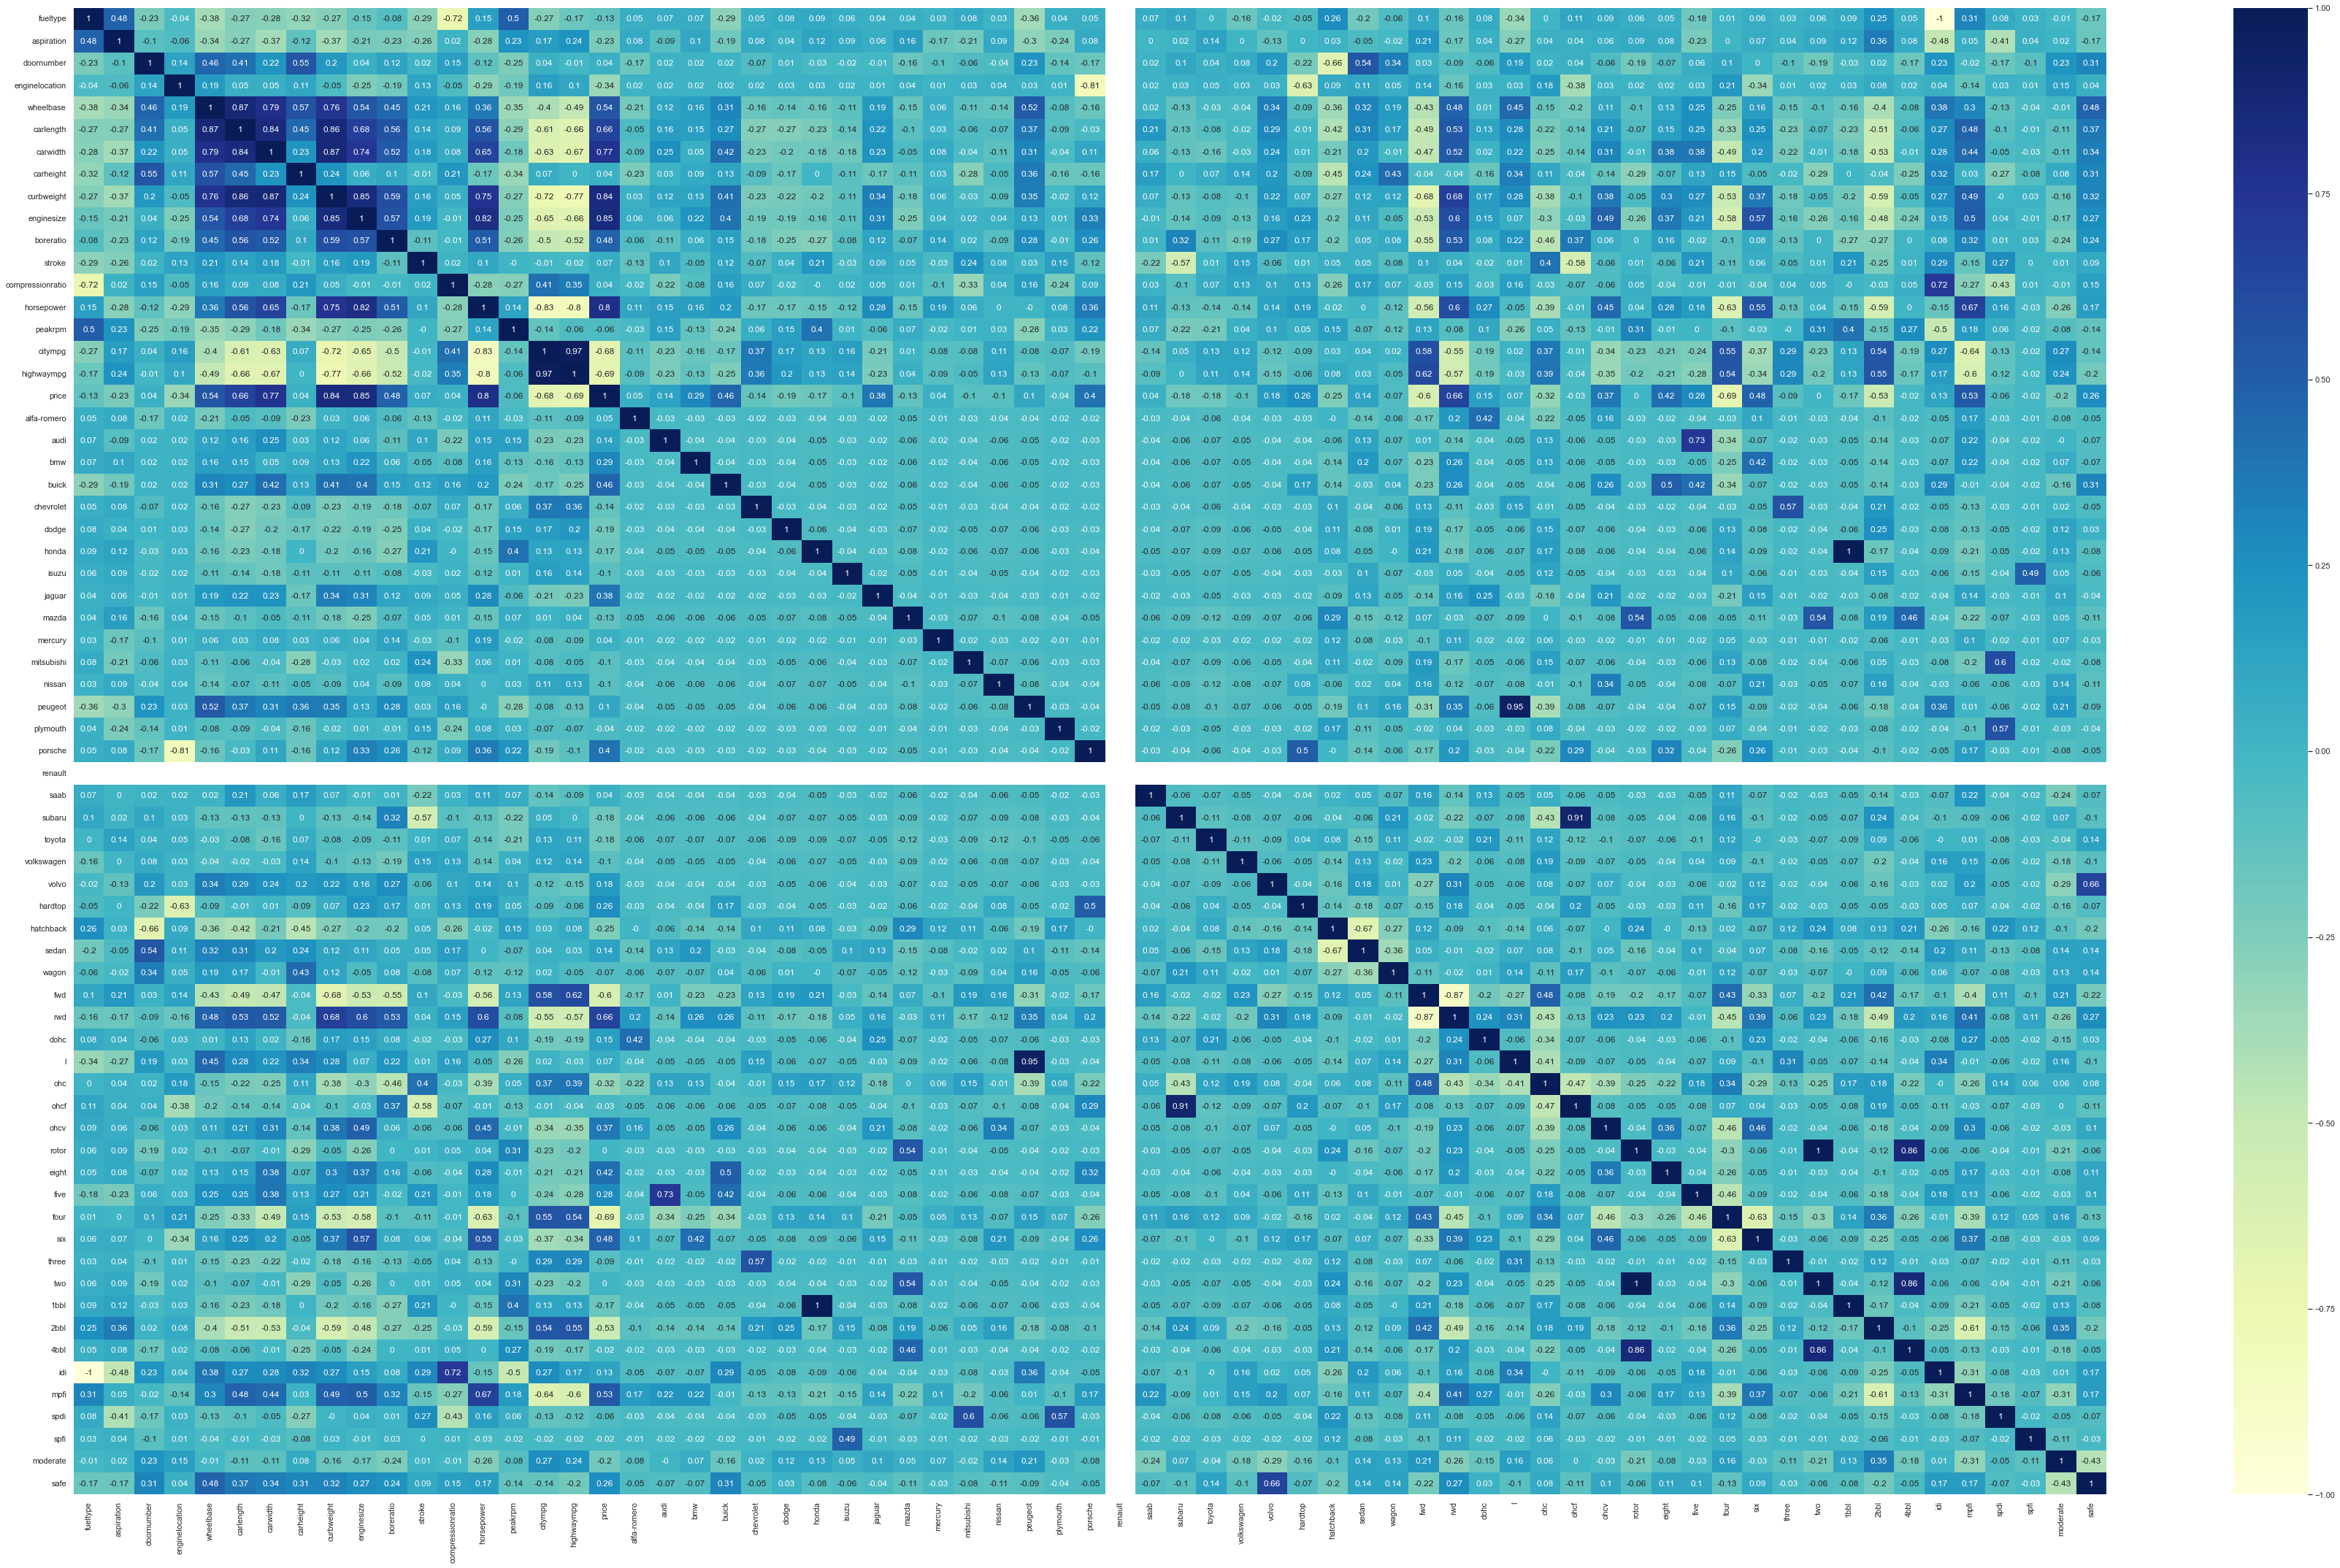

In [466]:
# heatmap
df_new = df[nums_vars]
plt.figure(figsize =(50,30))
sns.heatmap(round(df_train.corr(),2),annot=True , cmap="YlGnBu")
plt.tight_layout()
plt.autoscale()
plt.show()

In [467]:
y_train = df_train.pop('price')
X_train = df_train

In [468]:
X_train

fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
1           1           1           0               1   0.068966   0.450407   
165         1           1           0               1   0.272414   0.448780   
197         1           1           1               1   0.610345   0.775610   
169         1           1           0               1   0.406897   0.570732   
190         1           1           0               1   0.272414   0.400000   
..        ...         ...         ...             ...        ...        ...   
90          0           1           0               1   0.272414   0.393496   
106         1           1           0               1   0.434483   0.608130   
68          0           0           1               1   0.806897   0.809756   
25          1           1           1               1   0.244828   0.263415   
8           1           0           1               1   0.662069   0.839024   

     carwidth  carheight  curbweight  enginesize  boreratio  stroke  \
1    0.316667       48.8    0.411171    0.466216   0.664286    2.68   
165  0.308333       52.6    0.301396    0.250000   0.500000    3.08   
197  0.575000       57.5    0.602793    0.540541   0.885714    3.15   
169  0.441667       52.0    0.412335    0.574324   0.771429    3.50   
190  0.308333       51.4    0.284329    0.324324   0.464286    3.40   
..        ...        ...         ...         ...        ...     ...   
90   0.291667       54.5    0.205198    0.283784   0.321429    3.47   
106  0.633333       49.7    0.640419    0.810811   0.635714    3.27   
68   0.833333       58.7    0.877424    0.824324   0.742857    3.64   
25   0.291667       50.6    0.194337    0.195946   0.307143    3.23   
8    0.925000       55.9    0.619860    0.472973   0.421429    3.40   

     compressionratio  horsepower  peakrpm   citympg  highwaympg  alfa-romero  \
1                9.00    0.470149     5000  0.235294    0.277778            1   
165              9.40    0.477612     6600  0.382353    0.333333            0   
197              9.50    0.492537     5400  0.323529    0.305556            0   
169              9.30    0.507463     4800  0.323529    0.361111            0   
190              8.50    0.313433     5500  0.323529    0.333333            0   
..                ...         ...      ...       ...         ...          ...   
90              10.94    0.052239     4800  0.941176    0.916667            0   
106              9.00    0.835821     5200  0.176471    0.222222            0   
68              10.94    0.559701     4350  0.264706    0.222222            0   
25               9.40    0.149254     5500  0.529412    0.583333            0   
8                8.30    0.686567     5500  0.117647    0.083333            0   

     audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  mazda  mercury  \
1       0    0      0          0      0      0      0       0      0        0   
165     0    0      0          0      0      0      0       0      0        0   
197     0    0      0          0      0      0      0       0      0        0   
169     0    0      0          0      0      0      0       0      0        0   
190     0    0      0          0      0      0      0       0      0        0   
..    ...  ...    ...        ...    ...    ...    ...     ...    ...      ...   
90      0    0      0          0      0      0      0       0      0        0   
106     0    0      0          0      0      0      0       0      0        0   
68      0    0      1          0      0      0      0       0      0        0   
25      0    0      0          0      1      0      0       0      0        0   
8       1    0      0          0      0      0      0       0      0        0   

     mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  \
1             0       0        0         0        0        0     0       0   
165           0       0        0         0        0        0     0       0   
197           0       0

In [469]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [470]:
# add a constant
X_train_sm = sm.add_constant(X_train['compressionratio'])

# create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

# params
lr_model.params

const               0.146175
compressionratio    0.011142
dtype: float64

In [471]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2696
Date:                Sun, 08 Oct 2023   Prob (F-statistic):              0.604
Time:                        23:42:16   Log-Likelihood:                 8.2275
No. Observations:                 141   AIC:                            -12.46
Df Residuals:                     139   BIC:                            -6.558
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1462      0.197  

In [472]:
# add another variable doornumber
X_train_sm = X_train[['compressionratio','doornumber']]
X_train_sm = sm.add_constant(X_train_sm)

# create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

# params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.1943
Date:                Sun, 08 Oct 2023   Prob (F-statistic):              0.824
Time:                        23:42:17   Log-Likelihood:                 8.2892
No. Observations:                 141   AIC:                            -10.58
Df Residuals:                     138   BIC:                            -1.732
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1487      0.197  

In [473]:
# add another variable wheelbase
X_train_sm = X_train[['compressionratio','doornumber','wheelbase']]
X_train_sm = sm.add_constant(X_train_sm)

# create  model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

# params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     24.06
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.43e-12
Time:                        23:42:17   Log-Likelihood:                 37.930
No. Observations:                 141   AIC:                            -67.86
Df Residuals:                     137   BIC:                            -56.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0533      0.161  

In [474]:
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'alfa-romero', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohc', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'eight', 'five', 'four', 'six', 'three', 'two', '1bbl',
       '2bbl', '4bbl', 'idi', 'mpfi', 'spdi', 'spfi', 'moderate', 'safe'],
      dtype='object')

In [475]:
X_train = X_train.drop(['alfa-romero', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],axis=1)

In [476]:
# Adding all columns having correlation as from heatmap

X_train_sm = sm.add_constant(X_train)

# create  model
lr = sm.OLS(y_train, X_train_sm)
        
#fit
lr_model = lr.fit()
                        
# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     44.41
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           4.89e-48
Time:                        23:42:17   Log-Likelihood:                 217.12
No. Observations:                 141   AIC:                            -350.2
Df Residuals:                      99   BIC:                            -226.4
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4957      0.298      1.661      0.100      -0.096       1.088
fueltype             0.2267      0.134      1.693      0.094      -0.039       0.492
aspiration          -0.0752      0.032     -2.314      0.023      -0.140      -0.011
doornumber          -0.0048      0.021     -0.225      0.822      -0.047       0.037
enginelocation      -0.4522      0.101     -4.476      0.000      -0.653      -0.252
wheelbase            0.2338      0.119      1.968      0.052      -0.002       0.470
carlength           -0.2421      0.111     -2.173      0.032      -0.463      -0.021
carwidth             0.2951      0.102      2.886      0.005       0.092       0.498
carheight            0.0010      0.004      0.214      0.831      -0.008       0.010
curbweight           0.5458      0.143      3.813      0.000       0.262       0.830
enginesize           0.3275      0.171      1.915      0.058      -0.012       0.667
boreratio           -0.0677      0.079     -0.862      0.391      -0.223       0.088
stroke              -0.0797      0.032     -2.478      0.015      -0.143      -0.016
compressionratio    -0.0128      0.017     -0.754      0.453      -0.047       0.021
horsepower          -0.0999      0.119     -0.838      0.404      -0.337       0.137
peakrpm            3.18e-05    2.5e-05      1.270      0.207   -1.79e-05    8.15e-05
citympg             -0.0604      0.184     -0.328      0.744      -0.426       0.305
highwaympg           0.1206      0.169      0.712      0.478      -0.215       0.456
hardtop             -0.1021      0.061     -1.665      0.099      -0.224       0.020
hatchback           -0.1302      0.048     -2.706      0.008      -0.226      -0.035
sedan               -0.0846      0.052     -1.611      0.110      -0.189       0.020
wagon               -0.1189      0.058     -2.058      0.042      -0.234      -0.004
fwd                  0.0246      0.032      0.763      0.447      -0.039       0.088
rwd                  0.0717      0.040      1.800      0.075      -0.007       0.151
dohc                 0.1509      0.129      1.169      0.245      -0.105       0.407
l                   -0.0301      0.146     -0.206      0.837      -0.320       0.260
ohc                  0.1719      0.129      1.331      0.186      -0.084       0.428
ohcf                 0.1295      0.130      0.993      0.323      -0.129       0.388
ohcv                -0.0093      0.112     -0.083      0.934      -0.231       0.212
rotor                0.0004      0.088      0.005      0.996      -0.175       0.176
eight               -0.0683      0.106     -0.645      0.520      -0.278       0.142
five                -0.3565      0.105     -3.387      0.001      -0.565      -0.148
four                -0.3871      0.116     -3.341      0.001      -0.617      -0.157
six                 -0.

### VIF


Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [477]:
pd.reset_option('display.max_rows', None)


In [478]:
X_train_sm

const  fueltype  aspiration  doornumber  enginelocation  wheelbase  \
1      1.0         1           1           0               1   0.068966   
165    1.0         1           1           0               1   0.272414   
197    1.0         1           1           1               1   0.610345   
169    1.0         1           1           0               1   0.406897   
190    1.0         1           1           0               1   0.272414   
..     ...       ...         ...         ...             ...        ...   
90     1.0         0           1           0               1   0.272414   
106    1.0         1           1           0               1   0.434483   
68     1.0         0           0           1               1   0.806897   
25     1.0         1           1           1               1   0.244828   
8      1.0         1           0           1               1   0.662069   

     carlength  carwidth  carheight  curbweight  enginesize  boreratio  \
1     0.450407  0.316667       48.8    0.411171    0.466216   0.664286   
165   0.448780  0.308333       52.6    0.301396    0.250000   0.500000   
197   0.775610  0.575000       57.5    0.602793    0.540541   0.885714   
169   0.570732  0.441667       52.0    0.412335    0.574324   0.771429   
190   0.400000  0.308333       51.4    0.284329    0.324324   0.464286   
..         ...       ...        ...         ...         ...        ...   
90    0.393496  0.291667       54.5    0.205198    0.283784   0.321429   
106   0.608130  0.633333       49.7    0.640419    0.810811   0.635714   
68    0.809756  0.833333       58.7    0.877424    0.824324   0.742857   
25    0.263415  0.291667       50.6    0.194337    0.195946   0.307143   
8     0.839024  0.925000       55.9    0.619860    0.472973   0.421429   

     stroke  compressionratio  horsepower  peakrpm   citympg  highwaympg  \
1      2.68              9.00    0.470149     5000  0.235294    0.277778   
165    3.08              9.40    0.477612     6600  0.382353    0.333333   
197    3.15              9.50    0.492537     5400  0.323529    0.305556   
169    3.50              9.30    0.507463     4800  0.323529    0.361111   
190    3.40              8.50    0.313433     5500  0.323529    0.333333   
..      ...               ...         ...      ...       ...         ...   
90     3.47             10.94    0.052239     4800  0.941176    0.916667   
106    3.27              9.00    0.835821     5200  0.176471    0.222222   
68     3.64             10.94    0.559701     4350  0.264706    0.222222   
25     3.23              9.40    0.149254     5500  0.529412    0.583333   
8      3.40              8.30    0.686567     5500  0.117647    0.083333   

     hardtop  hatchback  sedan  wagon  fwd  rwd  dohc  l  ohc  ohcf  ohcv  \
1          0          0      0      0    0    1     1  0    0     0     0   
165        0          0      1      0    0    1     1  0    0     0     0   
197        0          0      0      1    0    1     0  0    1     0     0   
169        0          1      0      0    0    1     0  0    1     0     0   
190        0          1      0      0    1    0     0  0    1     0     0   
..       ...        ...    ...    ...  ...  ...   ... ..  ...   ...   ...   
90         0          0      1      0    1    0     0  0    1     0     0   
106        0          1      0      0    0    1     0  0    0     0     1   
68         0          0      0      1    0    1     0  0    1     0     0   
25         0          0      1      0    1    0     0  0    1     0     0   
8          0          0      1      0    1    0     0  0    1     0     0   

     rotor  eight  five  four  six  three  two  1bbl  2bbl  4bbl  idi  mpfi  \
1        0      0     0     1    0      0    0     0     0     0    0     1   
165      0      0     0     1    0      0    0     0     0     0    0     1   
197      0      0     0     1    0      0    0     0     0     0    0     1   
169      0      0     0     1    0      0    0     0     0   

In [479]:
# # Create a dataframe that will contain the names of all the feature
# # variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) 
              for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
40              mpfi     inf
35               two     inf
41              spdi     inf
42              spfi     inf
1           fueltype     inf
29             rotor     inf
36              1bbl     inf
37              2bbl     inf
38              4bbl     inf
39               idi     inf
26               ohc  131.64
32              four   90.33
10        enginesize   54.53
27              ohcf   52.36
25                 l   51.81
16           citympg   42.82
17        highwaympg   34.46
33               six   34.11
14        horsepower   32.83
9         curbweight   29.47
24              dohc   28.90
28              ohcv   27.34
20             sedan   25.24
31              five   24.35
5          wheelbase   20.40
19         hatchback   19.12
6          carlength   17.18
21             wagon   13.69
23               rwd   13.37
7           carwidth   12.59
22               fwd    9.27
13  compressionratio    8.67
30             eight    8.59
11         boreratio    8.34
34             three    7.34
2         aspiration    6.35
15           peakrpm    5.49
4     enginelocation    5.25
18           hardtop    4.74
8          carheight    4.55
3         doornumber    4.05
44              safe    3.91
12            stroke    3.76
43          moderate    2.99
0              const    0.00

In [480]:
# Dropping highly correlated variables and insignificant variables

X_train_sm = X_train_sm.drop(['mpfi',
    'two',
    'spdi',
    'spfi',
    'fueltype',
    'rotor',
    '1bbl',
    '2bbl',
    '4bbl',
    'idi'],axis=1)
X_train_sm

const  aspiration  doornumber  enginelocation  wheelbase  carlength  \
1      1.0           1           0               1   0.068966   0.450407   
165    1.0           1           0               1   0.272414   0.448780   
197    1.0           1           1               1   0.610345   0.775610   
169    1.0           1           0               1   0.406897   0.570732   
190    1.0           1           0               1   0.272414   0.400000   
..     ...         ...         ...             ...        ...        ...   
90     1.0           1           0               1   0.272414   0.393496   
106    1.0           1           0               1   0.434483   0.608130   
68     1.0           0           1               1   0.806897   0.809756   
25     1.0           1           1               1   0.244828   0.263415   
8      1.0           0           1               1   0.662069   0.839024   

     carwidth  carheight  curbweight  enginesize  boreratio  stroke  \
1    0.316667       48.8    0.411171    0.466216   0.664286    2.68   
165  0.308333       52.6    0.301396    0.250000   0.500000    3.08   
197  0.575000       57.5    0.602793    0.540541   0.885714    3.15   
169  0.441667       52.0    0.412335    0.574324   0.771429    3.50   
190  0.308333       51.4    0.284329    0.324324   0.464286    3.40   
..        ...        ...         ...         ...        ...     ...   
90   0.291667       54.5    0.205198    0.283784   0.321429    3.47   
106  0.633333       49.7    0.640419    0.810811   0.635714    3.27   
68   0.833333       58.7    0.877424    0.824324   0.742857    3.64   
25   0.291667       50.6    0.194337    0.195946   0.307143    3.23   
8    0.925000       55.9    0.619860    0.472973   0.421429    3.40   

     compressionratio  horsepower  peakrpm   citympg  highwaympg  hardtop  \
1                9.00    0.470149     5000  0.235294    0.277778        0   
165              9.40    0.477612     6600  0.382353    0.333333        0   
197              9.50    0.492537     5400  0.323529    0.305556        0   
169              9.30    0.507463     4800  0.323529    0.361111        0   
190              8.50    0.313433     5500  0.323529    0.333333        0   
..                ...         ...      ...       ...         ...      ...   
90              10.94    0.052239     4800  0.941176    0.916667        0   
106              9.00    0.835821     5200  0.176471    0.222222        0   
68              10.94    0.559701     4350  0.264706    0.222222        0   
25               9.40    0.149254     5500  0.529412    0.583333        0   
8                8.30    0.686567     5500  0.117647    0.083333        0   

     hatchback  sedan  wagon  fwd  rwd  dohc  l  ohc  ohcf  ohcv  eight  five  \
1            0      0      0    0    1     1  0    0     0     0      0     0   
165          0      1      0    0    1     1  0    0     0     0      0     0   
197          0      0      1    0    1     0  0    1     0     0      0     0   
169          1      0      0    0    1     0  0    1     0     0      0     0   
190          1      0      0    1    0     0  0    1     0     0      0     0   
..         ...    ...    ...  ...  ...   ... ..  ...   ...   ...    ...   ...   
90           0      1      0    1    0     0  0    1     0     0      0     0   
106          1      0      0    0    1     0  0    0     0     1      0     0   
68           0      0      1    0    1     0  0    1     0     0      0     1   
25           0      1      0    1    0     0  0    1     0     0      0     0   
8            0      1      0    1    0     0  0    1     0     0      0     1   

     four  six  three  moderate  safe  
1       1    0      0         0     0  
165     1    0      0         1     0  
197     1    0      0         0     1  
169     1    0      0         0     0  
190     1    0      0         0     0  
..    ...  ...    ...       ...   ...  
90      1    0      0         1     0  
106     0    1      0

In [481]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) 
              for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0              const  4288.37
25               ohc    75.86
30              four    52.24
15           citympg    38.42
9         enginesize    36.58
24                 l    33.21
16        highwaympg    32.78
26              ohcf    31.66
8         curbweight    27.09
19             sedan    21.40
13        horsepower    20.68
31               six    19.95
4          wheelbase    19.48
23              dohc    16.71
18         hatchback    16.08
27              ohcv    15.90
5          carlength    15.23
29              five    14.59
6           carwidth    11.92
22               rwd    11.70
20             wagon    11.21
21               fwd     8.70
10         boreratio     7.27
32             three     5.44
12  compressionratio     4.55
28             eight     4.50
3     enginelocation     4.42
17           hardtop     4.27
7          carheight     4.04
2         doornumber     3.82
14           peakrpm     3.67
34              safe     3.67
1         aspiration     3.13
11            stroke     2.84
33          moderate     2.25

In [482]:
# create  model
lr = sm.OLS(y_train, X_train_sm)
        
#fit
lr_model = lr.fit()
                        
# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     54.29
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           7.05e-53
Time:                        23:42:17   Log-Likelihood:                 213.47
No. Observations:                 141   AIC:                            -356.9
Df Residuals:                     106   BIC:                            -253.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5568      0.339      1.644      0.103      -0.115       1.228
aspiration          -0.0404      0.023     -1.786      0.077      -0.085       0.004
doornumber          -0.0027      0.020     -0.132      0.896      -0.043       0.038
enginelocation      -0.4225      0.092     -4.595      0.000      -0.605      -0.240
wheelbase            0.2530      0.115      2.197      0.030       0.025       0.481
carlength           -0.2643      0.104     -2.540      0.013      -0.471      -0.058
carwidth             0.3087      0.099      3.127      0.002       0.113       0.504
carheight            0.0022      0.004      0.525      0.601      -0.006       0.011
curbweight           0.5029      0.136      3.695      0.000       0.233       0.773
enginesize           0.2631      0.139      1.894      0.061      -0.012       0.539
boreratio           -0.0530      0.073     -0.729      0.468      -0.197       0.091
stroke              -0.0872      0.028     -3.148      0.002      -0.142      -0.032
compressionratio    -0.0044      0.012     -0.356      0.723      -0.029       0.020
horsepower          -0.0001      0.094     -0.001      0.999      -0.186       0.186
peakrpm           3.015e-05   2.03e-05      1.485      0.140   -1.01e-05    7.04e-05
citympg             -0.1150      0.173     -0.664      0.508      -0.458       0.228
highwaympg           0.1622      0.164      0.991      0.324      -0.162       0.487
hardtop             -0.1100      0.058     -1.904      0.060      -0.225       0.005
hatchback           -0.1448      0.044     -3.308      0.001      -0.232      -0.058
sedan               -0.1010      0.048     -2.106      0.038      -0.196      -0.006
wagon               -0.1350      0.052     -2.602      0.011      -0.238      -0.032
fwd                  0.0120      0.031      0.387      0.700      -0.049       0.073
rwd                  0.0563      0.037      1.522      0.131      -0.017       0.130
dohc                 0.2111      0.097      2.169      0.032       0.018       0.404
l                    0.0466      0.116      0.401      0.689      -0.184       0.277
ohc                  0.2376      0.097      2.444      0.016       0.045       0.430
ohcf                 0.1909      0.101      1.898      0.060      -0.009       0.390
ohcv                 0.0519      0.084      0.616      0.539      -0.115       0.219
eight               -0.0286      0.076     -0.376      0.708      -0.179       0.122
five                -0.3320      0.081     -4.109      0.000      -0.492      -0.172
four                -0.3707      0.087     -4.242      0.000      -0.544      -0.197
six                 -0.2518      0.073     -3.458      0.001      -0.396      -0.107
three               -0.0209      0.144     -0.145      0.885      -0.306       0.264
moderate             0.

In [483]:
# Dropping highly correlated variables and insignificant variables

X_train_sm = X_train_sm.drop(['aspiration'], axis=1)


In [484]:
# create  model
lr = sm.OLS(y_train, X_train_sm)
        
#fit
lr_model = lr.fit()
                        
# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     54.72
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           4.42e-53
Time:                        23:42:17   Log-Likelihood:                 211.38
No. Observations:                 141   AIC:                            -354.8
Df Residuals:                     107   BIC:                            -254.5
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5374      0.342      1.572      0.119      -0.140       1.215
doornumber          -0.0057      0.021     -0.279      0.781      -0.046       0.035
enginelocation      -0.4275      0.093     -4.605      0.000      -0.612      -0.243
wheelbase            0.2461      0.116      2.116      0.037       0.016       0.477
carlength           -0.3057      0.102     -2.984      0.004      -0.509      -0.103
carwidth             0.3307      0.099      3.342      0.001       0.135       0.527
carheight            0.0012      0.004      0.297      0.767      -0.007       0.010
curbweight           0.5726      0.132      4.346      0.000       0.311       0.834
enginesize           0.1530      0.126      1.217      0.226      -0.096       0.402
boreratio           -0.0557      0.073     -0.758      0.450      -0.201       0.090
stroke              -0.0732      0.027     -2.729      0.007      -0.126      -0.020
compressionratio    -0.0003      0.012     -0.023      0.982      -0.024       0.024
horsepower           0.0954      0.078      1.224      0.224      -0.059       0.250
peakrpm           1.437e-05   1.85e-05      0.778      0.438   -2.22e-05     5.1e-05
citympg             -0.0523      0.171     -0.305      0.761      -0.392       0.287
highwaympg           0.0952      0.161      0.592      0.555      -0.224       0.414
hardtop             -0.1103      0.058     -1.890      0.061      -0.226       0.005
hatchback           -0.1469      0.044     -3.323      0.001      -0.234      -0.059
sedan               -0.0971      0.048     -2.008      0.047      -0.193      -0.001
wagon               -0.1340      0.052     -2.556      0.012      -0.238      -0.030
fwd                  0.0158      0.031      0.508      0.612      -0.046       0.078
rwd                  0.0562      0.037      1.504      0.136      -0.018       0.130
dohc                 0.1926      0.098      1.970      0.051      -0.001       0.386
l                    0.0547      0.117      0.467      0.642      -0.178       0.287
ohc                  0.2344      0.098      2.387      0.019       0.040       0.429
ohcf                 0.1903      0.102      1.873      0.064      -0.011       0.392
ohcv                 0.0456      0.085      0.535      0.593      -0.123       0.214
eight               -0.0052      0.076     -0.069      0.945      -0.155       0.145
five                -0.2895      0.078     -3.711      0.000      -0.444      -0.135
four                -0.3266      0.085     -3.857      0.000      -0.494      -0.159
six                 -0.2186      0.071     -3.074      0.003      -0.360      -0.078
three                0.0090      0.144      0.062      0.950      -0.277       0.295
moderate             0.0101      0.016      0.628      0.531      -0.022       0.042
safe                -0.

In [485]:
# dropping more variables
X_train_sm = X_train_sm.drop(['compressionratio','highwaympg','eight','three'], axis=1)

In [486]:
# create  model
lr = sm.OLS(y_train, X_train_sm)
        
#fit
lr_model = lr.fit()
                        
# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     64.35
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.40e-56
Time:                        23:42:17   Log-Likelihood:                 211.13
No. Observations:                 141   AIC:                            -362.3
Df Residuals:                     111   BIC:                            -273.8
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5428      0.302      1.798      0.075      -0.055       1.141
doornumber        -0.0045      0.020     -0.228      0.820      -0.043       0.035
enginelocation    -0.4257      0.083     -5.138      0.000      -0.590      -0.262
wheelbase          0.2279      0.104      2.191      0.031       0.022       0.434
carlength         -0.3000      0.097     -3.092      0.003      -0.492      -0.108
carwidth           0.3317      0.094      3.546      0.001       0.146       0.517
carheight          0.0013      0.004      0.346      0.730      -0.006       0.009
curbweight         0.5605      0.121      4.621      0.000       0.320       0.801
enginesize         0.1571      0.097      1.618      0.109      -0.035       0.350
boreratio         -0.0516      0.064     -0.802      0.424      -0.179       0.076
stroke            -0.0764      0.025     -3.035      0.003      -0.126      -0.027
horsepower         0.0999      0.069      1.452      0.149      -0.036       0.236
peakrpm         1.434e-05   1.77e-05      0.809      0.420   -2.08e-05    4.95e-05
citympg            0.0327      0.070      0.464      0.644      -0.107       0.172
hardtop           -0.1041      0.055     -1.878      0.063      -0.214       0.006
hatchback         -0.1413      0.042     -3.369      0.001      -0.224      -0.058
sedan             -0.0919      0.046     -2.014      0.046      -0.182      -0.001
wagon             -0.1296      0.050     -2.585      0.011      -0.229      -0.030
fwd                0.0181      0.030      0.607      0.545      -0.041       0.077
rwd                0.0560      0.035      1.590      0.115      -0.014       0.126
dohc               0.1880      0.073      2.580      0.011       0.044       0.332
l                  0.0564      0.069      0.815      0.417      -0.081       0.193
ohc                0.2315      0.068      3.416      0.001       0.097       0.366
ohcf               0.1804      0.073      2.474      0.015       0.036       0.325
ohcv               0.0376      0.066      0.571      0.569      -0.093       0.168
five              -0.2888      0.051     -5.694      0.000      -0.389      -0.188
four              -0.3259      0.046     -7.088      0.000      -0.417      -0.235
six               -0.2143      0.043     -4.992      0.000      -0.299      -0.129
moderate           0.0093      0.016      0.596      0.552      -0.022       0.040
safe              -0.0557      0.030     -1.833      0.070      -0.116       0.005
==============================================================================
Omnibus:                        3.661   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                3.770
Skew:                          -0.167   Prob(JB):                        0.152
Kurtosis:                   

In [487]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) 
              for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0            const  3452.07
22             ohc    37.34
7       curbweight    21.78
16           sedan    19.64
8       enginesize    18.11
23            ohcf    16.86
3        wheelbase    16.09
15       hatchback    14.96
26            four    14.65
4        carlength    13.41
21               l    11.93
11      horsepower    11.25
5         carwidth    10.85
19             rwd    10.75
17           wagon    10.60
24            ohcv     9.84
20            dohc     9.48
18             fwd     8.16
27             six     7.02
13         citympg     6.44
25            five     5.82
9        boreratio     5.76
14         hardtop     3.98
2   enginelocation     3.64
1       doornumber     3.61
6        carheight     3.52
29            safe     3.33
12         peakrpm     2.83
10          stroke     2.38
28        moderate     2.17

In [488]:
# dropping more variables
X_train_sm = X_train_sm.drop(['fwd','ohcv'], axis=1)

In [489]:
# create  model
lr = sm.OLS(y_train, X_train_sm)
        
#fit
lr_model = lr.fit()
                        
# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     69.92
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.77e-58
Time:                        23:42:17   Log-Likelihood:                 210.70
No. Observations:                 141   AIC:                            -365.4
Df Residuals:                     113   BIC:                            -282.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6108      0.288      2.121      0.036       0.040       1.181
doornumber        -0.0046      0.020     -0.236      0.814      -0.043       0.034
enginelocation    -0.4243      0.080     -5.288      0.000      -0.583      -0.265
wheelbase          0.2389      0.102      2.341      0.021       0.037       0.441
carlength         -0.2845      0.095     -3.008      0.003      -0.472      -0.097
carwidth           0.3214      0.088      3.651      0.000       0.147       0.496
carheight          0.0007      0.004      0.198      0.843      -0.007       0.008
curbweight         0.5323      0.110      4.821      0.000       0.314       0.751
enginesize         0.1977      0.079      2.491      0.014       0.040       0.355
boreratio         -0.0676      0.058     -1.167      0.246      -0.182       0.047
stroke            -0.0796      0.024     -3.288      0.001      -0.128      -0.032
horsepower         0.1046      0.068      1.541      0.126      -0.030       0.239
peakrpm         1.517e-05   1.76e-05      0.863      0.390   -1.97e-05       5e-05
citympg            0.0472      0.068      0.698      0.487      -0.087       0.181
hardtop           -0.1090      0.055     -1.988      0.049      -0.218      -0.000
hatchback         -0.1470      0.041     -3.584      0.001      -0.228      -0.066
sedan             -0.0973      0.045     -2.168      0.032      -0.186      -0.008
wagon             -0.1354      0.049     -2.749      0.007      -0.233      -0.038
rwd                0.0365      0.022      1.670      0.098      -0.007       0.080
dohc               0.1519      0.039      3.858      0.000       0.074       0.230
l                  0.0278      0.049      0.568      0.571      -0.069       0.125
ohc                0.1966      0.035      5.558      0.000       0.127       0.267
ohcf               0.1429      0.049      2.936      0.004       0.046       0.239
five              -0.2775      0.045     -6.147      0.000      -0.367      -0.188
four              -0.3097      0.037     -8.309      0.000      -0.384      -0.236
six               -0.2047      0.039     -5.194      0.000      -0.283      -0.127
moderate           0.0082      0.015      0.535      0.594      -0.022       0.039
safe              -0.0537      0.030     -1.809      0.073      -0.112       0.005
==============================================================================
Omnibus:                        3.847   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                4.155
Skew:                          -0.154   Prob(JB):                        0.125
Kurtosis:                       3.782   Cond. No.                     3.01e+05
==============================================================================

Notes:
[1] Standard Errors assume t

In [490]:
# dropping more variables
X_train_sm = X_train_sm.drop(['l','peakrpm'], axis=1)

In [491]:
# create  model
lr = sm.OLS(y_train, X_train_sm)
        
#fit
lr_model = lr.fit()
                        
# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     76.19
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           5.69e-60
Time:                        23:42:17   Log-Likelihood:                 210.13
No. Observations:                 141   AIC:                            -368.3
Df Residuals:                     115   BIC:                            -291.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7456      0.247      3.023      0.003       0.257       1.234
doornumber        -0.0056      0.019     -0.289      0.773      -0.044       0.033
enginelocation    -0.4608      0.068     -6.764      0.000      -0.596      -0.326
wheelbase          0.2696      0.088      3.081      0.003       0.096       0.443
carlength         -0.3066      0.091     -3.368      0.001      -0.487      -0.126
carwidth           0.3263      0.084      3.871      0.000       0.159       0.493
carheight          0.0007      0.004      0.177      0.860      -0.007       0.008
curbweight         0.5102      0.106      4.830      0.000       0.301       0.719
enginesize         0.1758      0.075      2.333      0.021       0.027       0.325
boreratio         -0.0692      0.057     -1.205      0.231      -0.183       0.045
stroke            -0.0801      0.024     -3.324      0.001      -0.128      -0.032
horsepower         0.1270      0.062      2.035      0.044       0.003       0.251
citympg            0.0421      0.064      0.661      0.510      -0.084       0.168
hardtop           -0.1118      0.054     -2.074      0.040      -0.219      -0.005
hatchback         -0.1471      0.041     -3.610      0.000      -0.228      -0.066
sedan             -0.0934      0.044     -2.124      0.036      -0.181      -0.006
wagon             -0.1290      0.048     -2.692      0.008      -0.224      -0.034
rwd                0.0384      0.022      1.783      0.077      -0.004       0.081
dohc               0.1423      0.034      4.196      0.000       0.075       0.210
ohc                0.1807      0.023      7.783      0.000       0.135       0.227
ohcf               0.1190      0.038      3.151      0.002       0.044       0.194
five              -0.2669      0.040     -6.604      0.000      -0.347      -0.187
four              -0.2997      0.032     -9.270      0.000      -0.364      -0.236
six               -0.2045      0.039     -5.259      0.000      -0.281      -0.127
moderate           0.0068      0.015      0.448      0.655      -0.023       0.037
safe              -0.0610      0.026     -2.303      0.023      -0.113      -0.009
==============================================================================
Omnibus:                        3.515   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.770
Skew:                          -0.121   Prob(JB):                        0.152
Kurtosis:                       3.763   Cond. No.                     2.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+03. This might indicate that there are
strong multicollineari

In [492]:
# dropping more variables
X_train_sm = X_train_sm.drop(['carheight','doornumber'], axis=1)

In [493]:
# create  model
lr = sm.OLS(y_train, X_train_sm)
        
#fit
lr_model = lr.fit()
                        
# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     84.17
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           7.14e-62
Time:                        23:42:17   Log-Likelihood:                 210.06
No. Observations:                 141   AIC:                            -372.1
Df Residuals:                     117   BIC:                            -301.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7841      0.110      7.150      0.000       0.567       1.001
enginelocation    -0.4614      0.066     -7.010      0.000      -0.592      -0.331
wheelbase          0.2765      0.079      3.483      0.001       0.119       0.434
carlength         -0.3076      0.090     -3.410      0.001      -0.486      -0.129
carwidth           0.3226      0.083      3.903      0.000       0.159       0.486
curbweight         0.5081      0.103      4.955      0.000       0.305       0.711
enginesize         0.1785      0.073      2.439      0.016       0.034       0.323
boreratio         -0.0702      0.056     -1.243      0.216      -0.182       0.042
stroke            -0.0817      0.023     -3.564      0.001      -0.127      -0.036
horsepower         0.1287      0.061      2.110      0.037       0.008       0.249
citympg            0.0447      0.063      0.714      0.477      -0.079       0.169
hardtop           -0.1116      0.053     -2.094      0.038      -0.217      -0.006
hatchback         -0.1469      0.040     -3.655      0.000      -0.226      -0.067
sedan             -0.0962      0.043     -2.249      0.026      -0.181      -0.011
wagon             -0.1308      0.046     -2.815      0.006      -0.223      -0.039
rwd                0.0389      0.020      1.959      0.053      -0.000       0.078
dohc               0.1417      0.033      4.271      0.000       0.076       0.207
ohc                0.1811      0.023      7.870      0.000       0.136       0.227
ohcf               0.1180      0.037      3.208      0.002       0.045       0.191
five              -0.2654      0.039     -6.756      0.000      -0.343      -0.188
four              -0.2994      0.031     -9.536      0.000      -0.362      -0.237
six               -0.2048      0.037     -5.548      0.000      -0.278      -0.132
moderate           0.0055      0.014      0.379      0.706      -0.023       0.034
safe              -0.0633      0.025     -2.506      0.014      -0.113      -0.013
==============================================================================
Omnibus:                        3.538   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.777
Skew:                          -0.128   Prob(JB):                        0.151
Kurtosis:                       3.760   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [494]:
# dropping more variables
X_train_sm = X_train_sm.drop(['moderate'], axis=1)

In [495]:
# create  model
lr = sm.OLS(y_train, X_train_sm)
        
#fit
lr_model = lr.fit()
                        
# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     88.64
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           8.03e-63
Time:                        23:42:17   Log-Likelihood:                 209.98
No. Observations:                 141   AIC:                            -374.0
Df Residuals:                     118   BIC:                            -306.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7854      0.109      7.192      0.000       0.569       1.002
enginelocation    -0.4612      0.066     -7.032      0.000      -0.591      -0.331
wheelbase          0.2822      0.078      3.637      0.000       0.129       0.436
carlength         -0.3147      0.088     -3.582      0.000      -0.489      -0.141
carwidth           0.3275      0.081      4.024      0.000       0.166       0.489
curbweight         0.5055      0.102      4.959      0.000       0.304       0.707
enginesize         0.1818      0.072      2.511      0.013       0.038       0.325
boreratio         -0.0726      0.056     -1.298      0.197      -0.183       0.038
stroke            -0.0822      0.023     -3.606      0.000      -0.127      -0.037
horsepower         0.1279      0.061      2.107      0.037       0.008       0.248
citympg            0.0454      0.062      0.728      0.468      -0.078       0.169
hardtop           -0.1111      0.053     -2.092      0.039      -0.216      -0.006
hatchback         -0.1449      0.040     -3.649      0.000      -0.224      -0.066
sedan             -0.0929      0.042     -2.227      0.028      -0.175      -0.010
wagon             -0.1262      0.045     -2.823      0.006      -0.215      -0.038
rwd                0.0389      0.020      1.967      0.051      -0.000       0.078
dohc               0.1412      0.033      4.274      0.000       0.076       0.207
ohc                0.1808      0.023      7.891      0.000       0.135       0.226
ohcf               0.1176      0.037      3.211      0.002       0.045       0.190
five              -0.2644      0.039     -6.770      0.000      -0.342      -0.187
four              -0.2976      0.031     -9.622      0.000      -0.359      -0.236
six               -0.2031      0.037     -5.564      0.000      -0.275      -0.131
safe              -0.0685      0.021     -3.237      0.002      -0.110      -0.027
==============================================================================
Omnibus:                        3.821   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                4.156
Skew:                          -0.147   Prob(JB):                        0.125
Kurtosis:                       3.788   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [496]:
X_train_sm.shape

(141, 23)

# Residual Analysis of the train data


In [497]:
y_train_price = lr_model.predict(X_train_sm)

Text(0.5, 0, 'Errors')

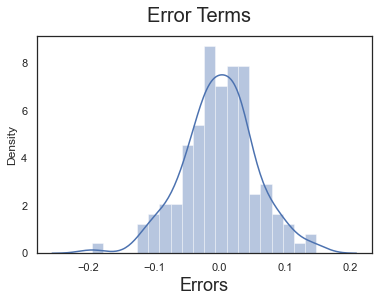

In [498]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)    

# Making Predictions Using the Final Model


In [499]:
df_test[nums_vars] = scaler.transform(df_test[nums_vars])

In [500]:
df_test.describe()

fueltype  aspiration  doornumber  enginelocation  wheelbase  \
count  61.000000   61.000000   61.000000       61.000000  61.000000   
mean    0.934426    0.868852    0.573770        0.983607   0.409893   
std     0.249590    0.340363    0.498632        0.128037   0.201226   
min     0.000000    0.000000    0.000000        0.000000   0.000000   
25%     1.000000    1.000000    0.000000        1.000000   0.272414   
50%     1.000000    1.000000    1.000000        1.000000   0.341379   
75%     1.000000    1.000000    1.000000        1.000000   0.544828   
max     1.000000    1.000000    1.000000        1.000000   1.000000   

       carlength   carwidth  carheight  curbweight  enginesize  boreratio  \
count  61.000000  61.000000  61.000000   61.000000   61.000000  61.000000   
mean    0.527602   0.458880  53.347541    0.398320    0.423460   0.559251   
std     0.196615   0.151657   2.336137    0.192157    0.214661   0.190315   
min     0.056911   0.291667  49.400000    0.087277    0.121622   0.264286   
25%     0.417886   0.341667  51.000000    0.264158    0.250000   0.435714   
50%     0.521951   0.433333  53.000000    0.354926    0.398649   0.521429   
75%     0.596748   0.516667  55.200000    0.557797    0.540541   0.742857   
max     1.000000   0.950000  59.800000    1.000000    1.000000   1.000000   

          stroke  compressionratio  horsepower      peakrpm    citympg  \
count  61.000000         61.000000   61.000000    61.000000  61.000000   
mean    3.312787          8.989508    0.409469  5172.950820   0.377049   
std     0.310334          0.860888    0.266532   443.900681   0.200598   
min     2.190000          7.000000    0.029851  4200.000000   0.058824   
25%     3.150000          8.600000    0.164179  4800.000000   0.205882   
50%     3.290000          9.000000    0.365672  5200.000000   0.323529   
75%     3.460000          9.400000    0.507463  5500.000000   0.529412   
max     4.170000         10.940000    1.000000  6600.000000   1.058824   

       highwaympg      price  alfa-romero       audi        bmw      buick  \
count   61.000000  61.000000         61.0  61.000000  61.000000  61.000000   
mean     0.410747   0.232683          0.0   0.032787   0.032787   0.016393   
std      0.200123   0.221210          0.0   0.179556   0.179556   0.128037   
min      0.055556   0.008532          0.0   0.000000   0.000000   0.000000   
25%      0.250000   0.082489          0.0   0.000000   0.000000   0.000000   
50%      0.361111   0.142340          0.0   0.000000   0.000000   0.000000   
75%      0.555556   0.364492          0.0   0.000000   0.000000   0.000000   
max      1.027778   1.004660          0.0   1.000000   1.000000   1.000000   

       chevrolet      dodge      honda  isuzu     jaguar      mazda  mercury  \
count       61.0  61.000000  61.000000   61.0  61.000000  61.000000     61.0   
mean         0.0   0.032787   0.081967    0.0   0.016393   0.065574      0.0   
std          0.0   0.179556   0.276591    0.0   0.128037   0.249590      0.0   
min          0.0   0.000000   0.000000    0.0   0.000000   0.000000      0.0   
25%          0.0   0.000000   0.000000    0.0   0.000000   0.000000      0.0   
50%          0.0   0.000000   0.000000    0.0   0.000000   0.000000      0.0   
75%          0.0   0.000000   0.000000    0.0   0.000000   0.000000      0.0   
max          0.0   1.000000   1.000000    0.0   1.000000   1.000000      0.0   

       mitsubishi     nissan    peugeot   plymouth    porsche    renault  \
count   61.000000  61.000000  61.000000  61.000000  61.000000  61.000000   
mean     0.098361   0.081967   0.032787   0.081967   0.032787   0.032787   
std      0.300273   0.276591   0.179556   0.276591   0.179556   0.179556   
min      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%      0.000000   0.000000   0.000000   0.000000 

# Dividing into X_test and y_test

In [501]:
y_test = df_test.pop('price')
X_test = df_test

In [502]:
X_test.shape

(61, 66)

In [503]:
X_test_m4 = sm.add_constant(X_test)

In [504]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['mpfi','two',
    'spdi',
    'spfi',
    'fueltype',
    'rotor',
    '1bbl',
    '2bbl',
    '4bbl',
    'idi','aspiration','compressionratio','highwaympg','eight','three','fwd','ohcv','l','peakrpm','carheight','doornumber','moderate','alfa-romero', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], axis = 1)

In [505]:
X_test_m4.shape

(61, 23)

In [506]:
y_pred_m4 = lr_model.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

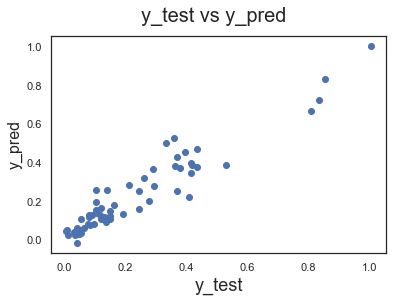

In [507]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    